# Notes
Jake Mitchell

- Year, county are useless.  Year is all the same, county is a primary key
- west, central, and urban are binary.  We will have to treat them differently
- important measures are crmrte, prbarr, prbconv, prbpris
- I would like to use the top 4 columns across all of our analysis, ie, everything has a relationship to the 4 variables<br> ex. (0.25, 0.15, 0.5, 0.01)
- 

#### Questions
? What is the model he is talking about?<br>
? Are we looking at only 3+ relationships or categories of relationships?<br>

In [100]:
library(ggplot2)
library(GGally)
options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 30)
options(repr.plot.width=10, repr.plot.height=10)

In [107]:
df = read.csv("crime_v2.csv")
dfNA = df[!complete.cases(df),]
df = df[complete.cases(df),]
df = subset(df, select=-c(year, county))

In [108]:
summary(df)

     crmrte             prbarr           prbconv           prbpris      
 Min.   :0.005533   Min.   :0.09277   Min.   :0.06838   Min.   :0.1500  
 1st Qu.:0.020927   1st Qu.:0.20568   1st Qu.:0.34541   1st Qu.:0.3648  
 Median :0.029986   Median :0.27095   Median :0.45283   Median :0.4234  
 Mean   :0.033400   Mean   :0.29492   Mean   :0.55128   Mean   :0.4108  
 3rd Qu.:0.039642   3rd Qu.:0.34438   3rd Qu.:0.58886   3rd Qu.:0.4568  
 Max.   :0.098966   Max.   :1.09091   Max.   :2.12121   Max.   :0.6000  
     avgsen           polpc              density            taxpc       
 Min.   : 5.380   Min.   :0.0007459   Min.   :0.00002   Min.   : 25.69  
 1st Qu.: 7.340   1st Qu.:0.0012308   1st Qu.:0.54741   1st Qu.: 30.66  
 Median : 9.100   Median :0.0014853   Median :0.96226   Median : 34.87  
 Mean   : 9.647   Mean   :0.0017022   Mean   :1.42884   Mean   : 38.06  
 3rd Qu.:11.420   3rd Qu.:0.0018768   3rd Qu.:1.56824   3rd Qu.: 40.95  
 Max.   :20.700   Max.   :0.0090543   Max.   :8.827

In [109]:
df

crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0.0356036,0.298270,0.5275960,0.436170,6.71,0.00182786,2.4226327,30.99368,0,1,0,20.21870,281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
0.0152532,0.132029,1.4814800,0.450000,6.35,0.00074588,1.0463320,26.89208,0,1,0,7.91632,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
0.0129603,0.444444,0.2678570,0.600000,6.76,0.00123431,0.4127659,34.81605,1,0,0,3.16053,226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
0.0267532,0.364760,0.5254240,0.435484,7.14,0.00152994,0.4915572,42.94759,0,1,0,47.91610,375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
0.0106232,0.518219,0.4765630,0.442623,8.22,0.00086018,0.5469484,28.05474,1,0,0,1.79619,292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
0.0146067,0.524664,0.0683761,0.500000,13.00,0.00288203,0.6113361,35.22974,1,0,0,1.54070,250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920
0.0296409,0.365004,0.5206070,0.420833,10.55,0.00133771,0.5169492,30.69649,0,0,0,32.17940,238.3064,366.3004,205.5358,310.1737,259.3391,303.42,449.84,350.72,283.76,0.15237226,0.07073344
0.0202814,0.392111,0.7692310,0.507692,10.64,0.00103525,0.3009986,34.00304,0,0,0,61.05400,253.5926,353.2182,199.2377,356.1254,206.2816,235.05,416.49,370.62,297.13,0.23495702,0.07430546
0.0304289,0.251599,0.4364410,0.436893,7.32,0.00129761,0.3503982,34.96204,0,0,0,40.38900,193.6432,346.6011,202.9595,268.3363,208.2520,339.76,389.51,322.06,278.39,0.21818182,0.07769163
0.0221567,0.162860,1.2256100,0.333333,10.34,0.00202425,0.5767442,61.15251,0,0,0,24.31170,260.1381,613.2261,191.2452,290.5141,266.0934,567.06,403.15,258.33,299.44,0.05334728,0.07713232


Warning message:
"Removed 8281 rows containing non-finite values (stat_smooth)."

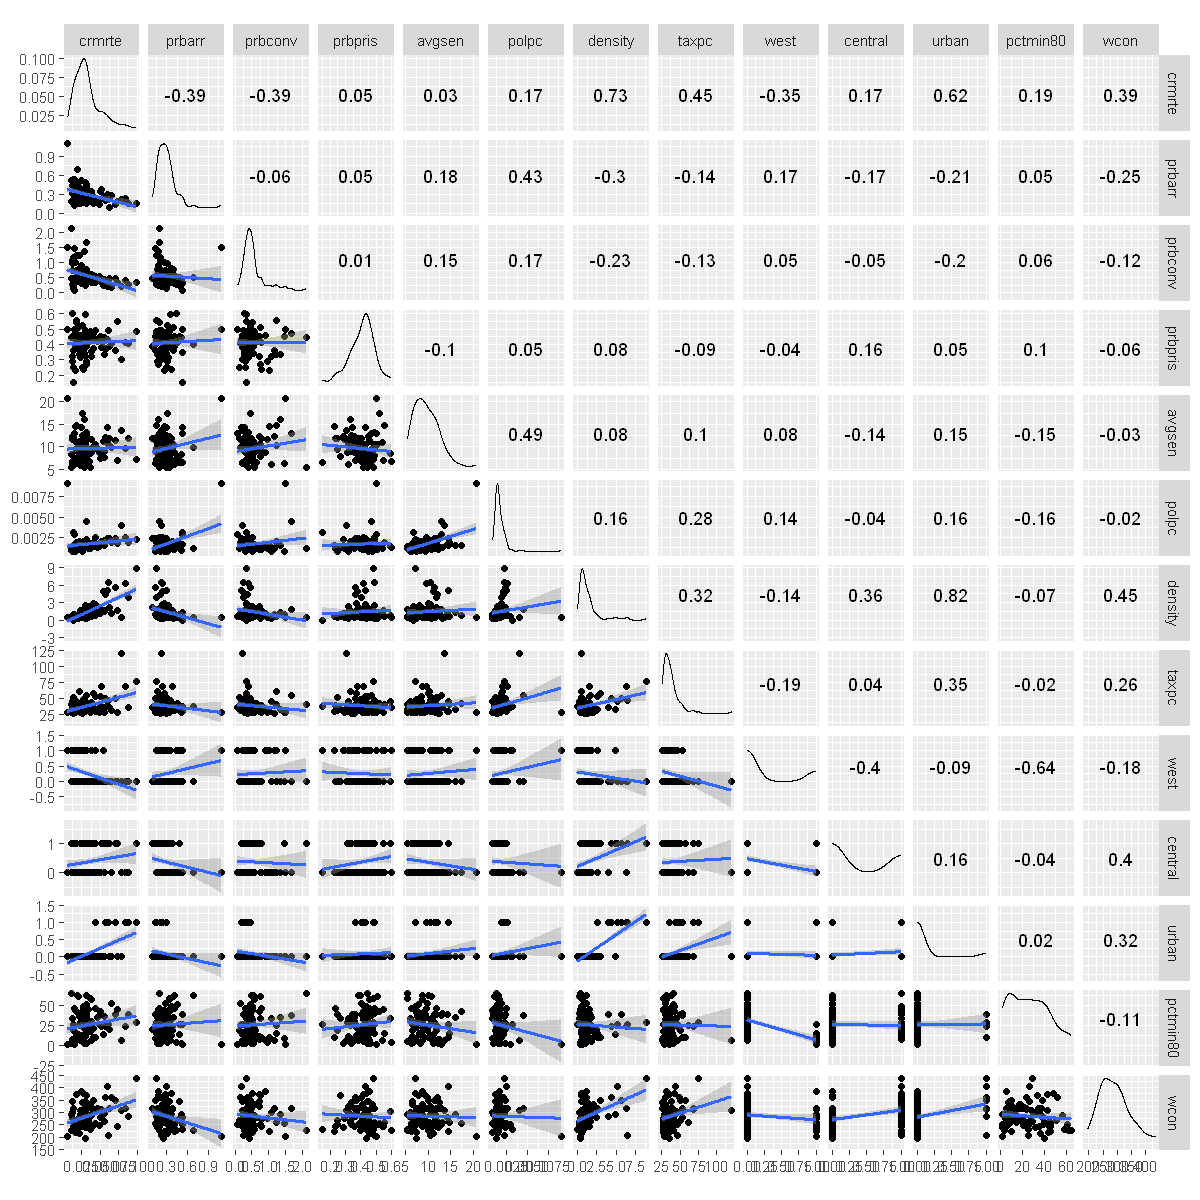

In [110]:
ggscatmat(df[1:13]) +
geom_smooth(method="lm")

Warning message:
"Removed 9555 rows containing non-finite values (stat_smooth)."

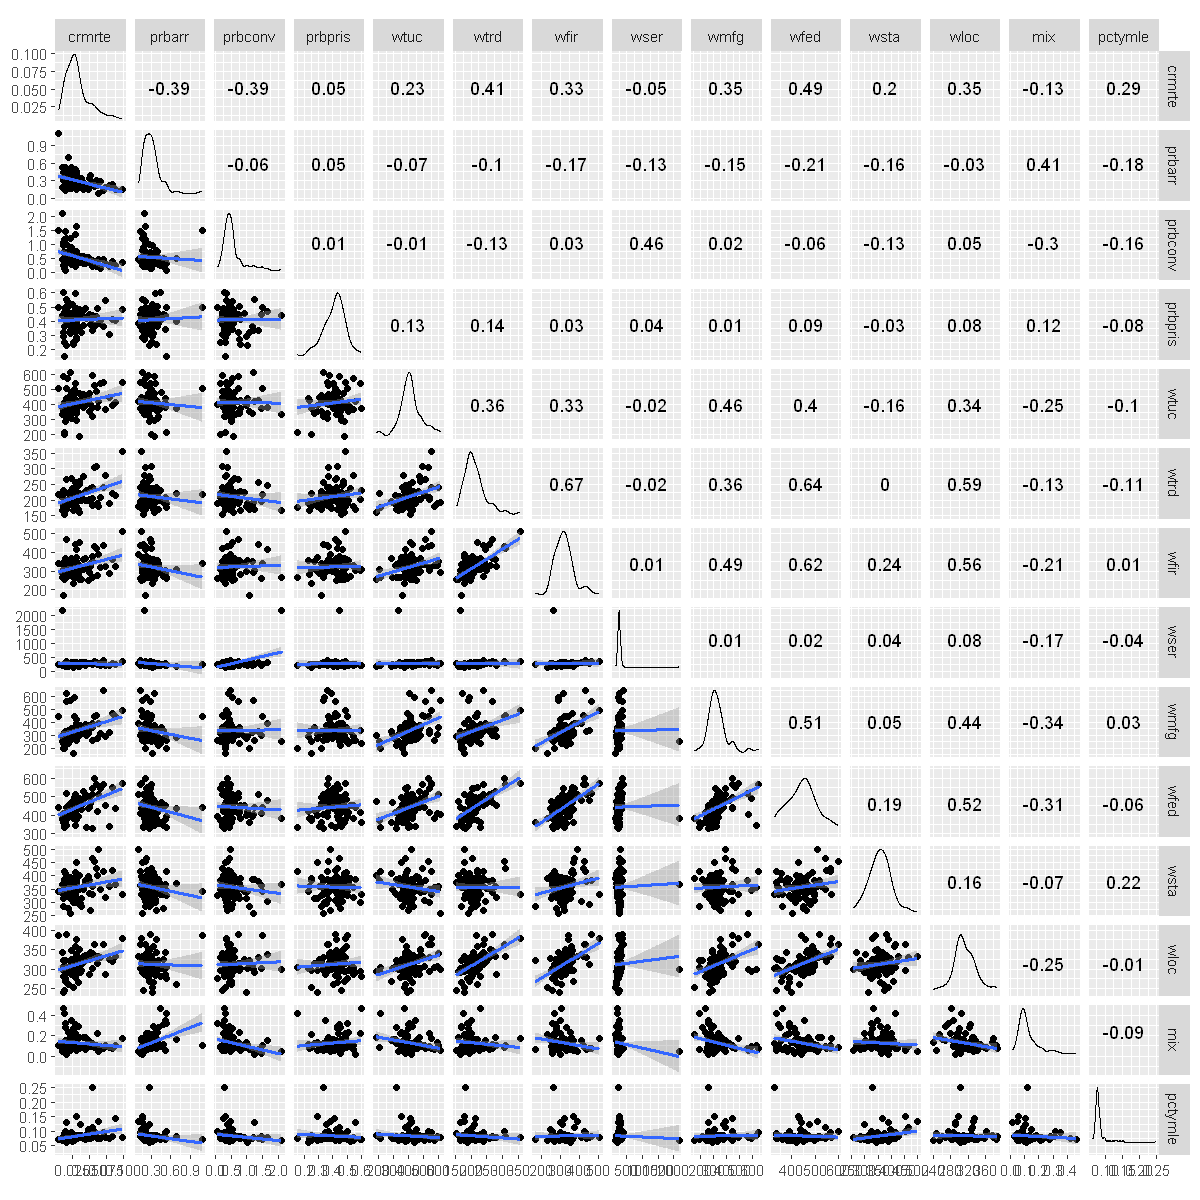

In [111]:
ggscatmat(df[c(1,2,3,4,14,15,16,17,18,19,20,21,22,23)]) +
geom_smooth(method="lm")

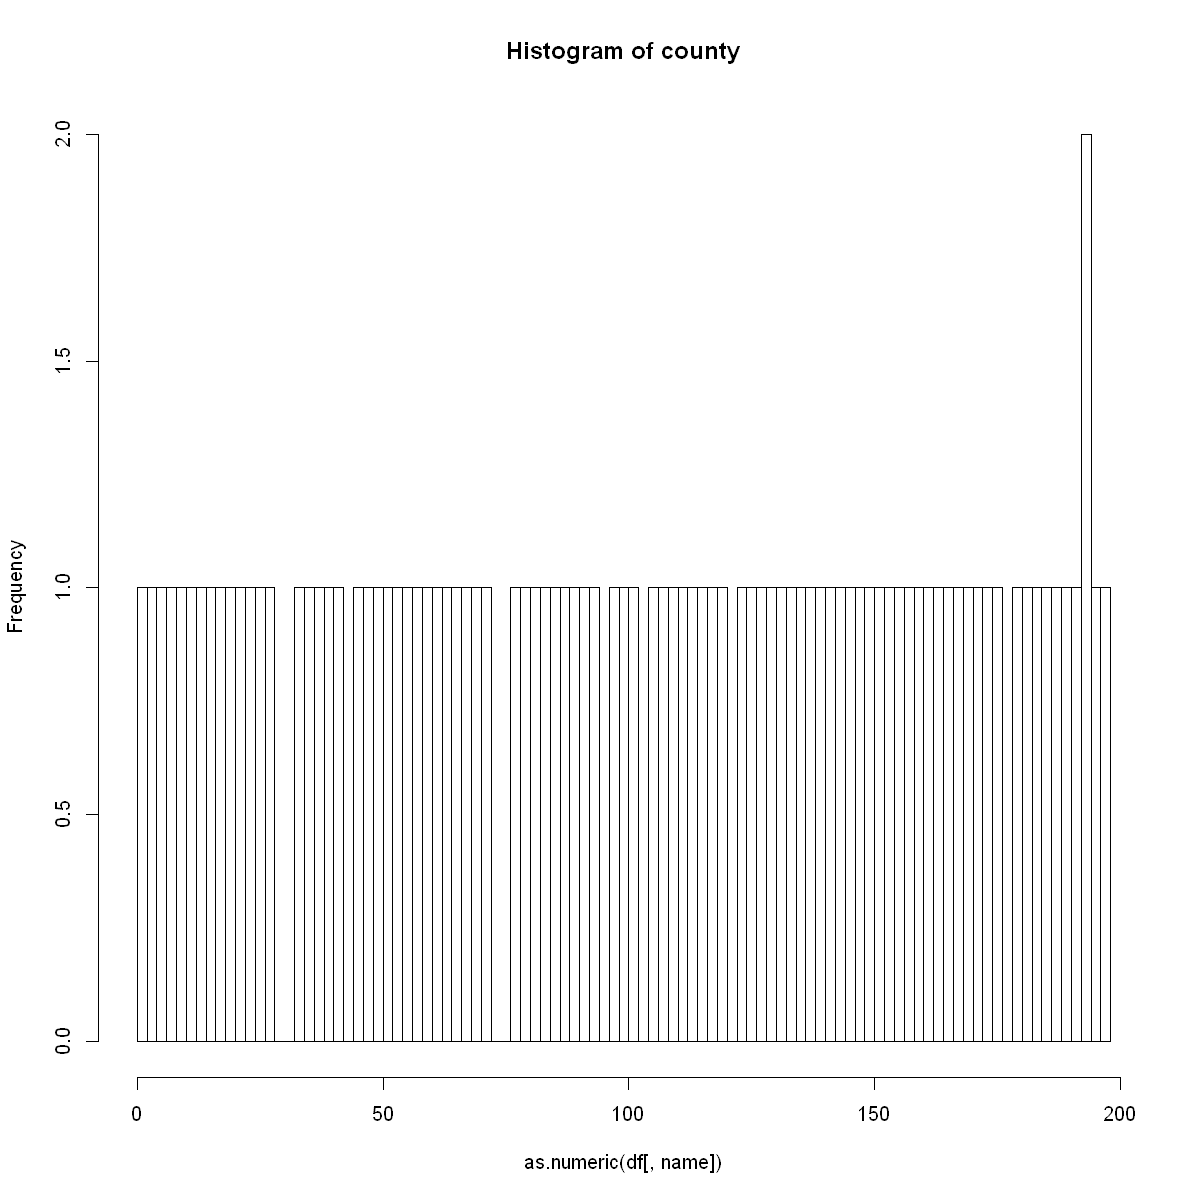

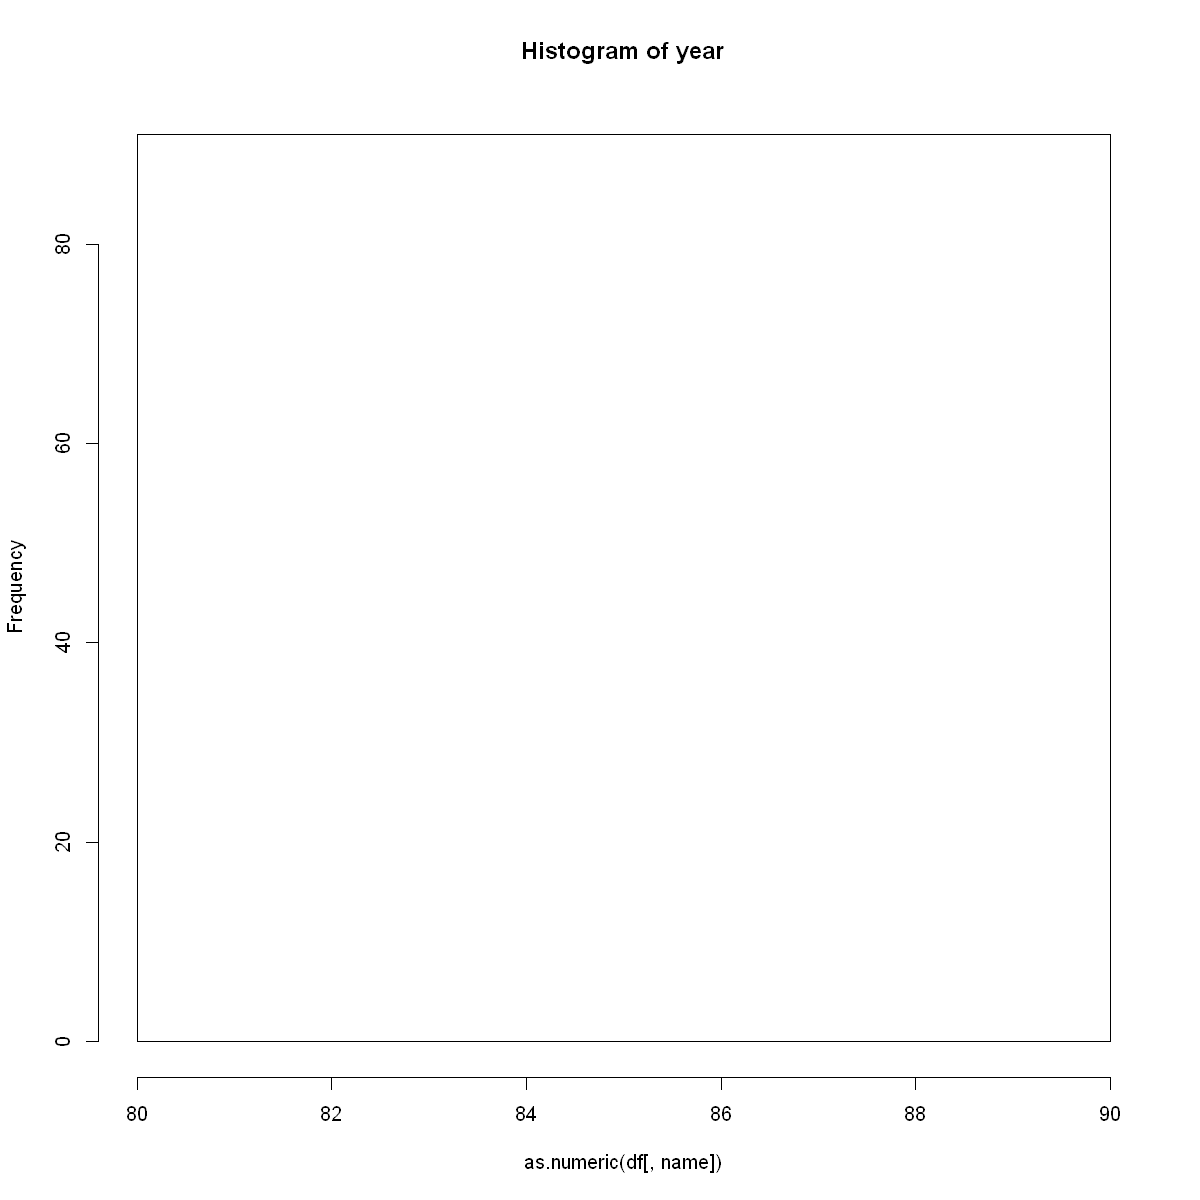

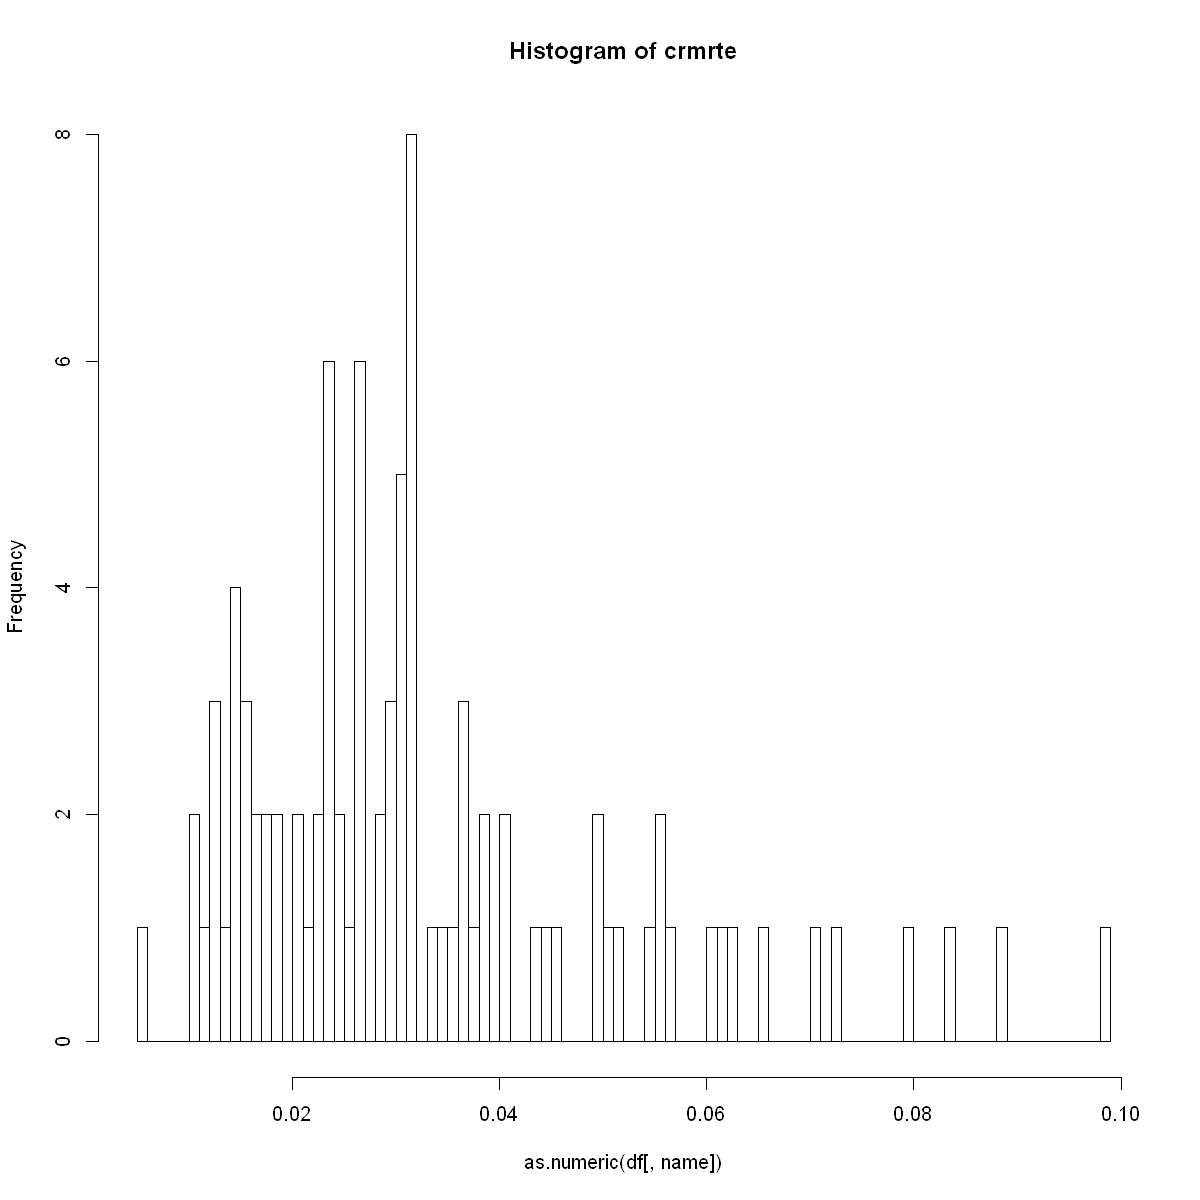

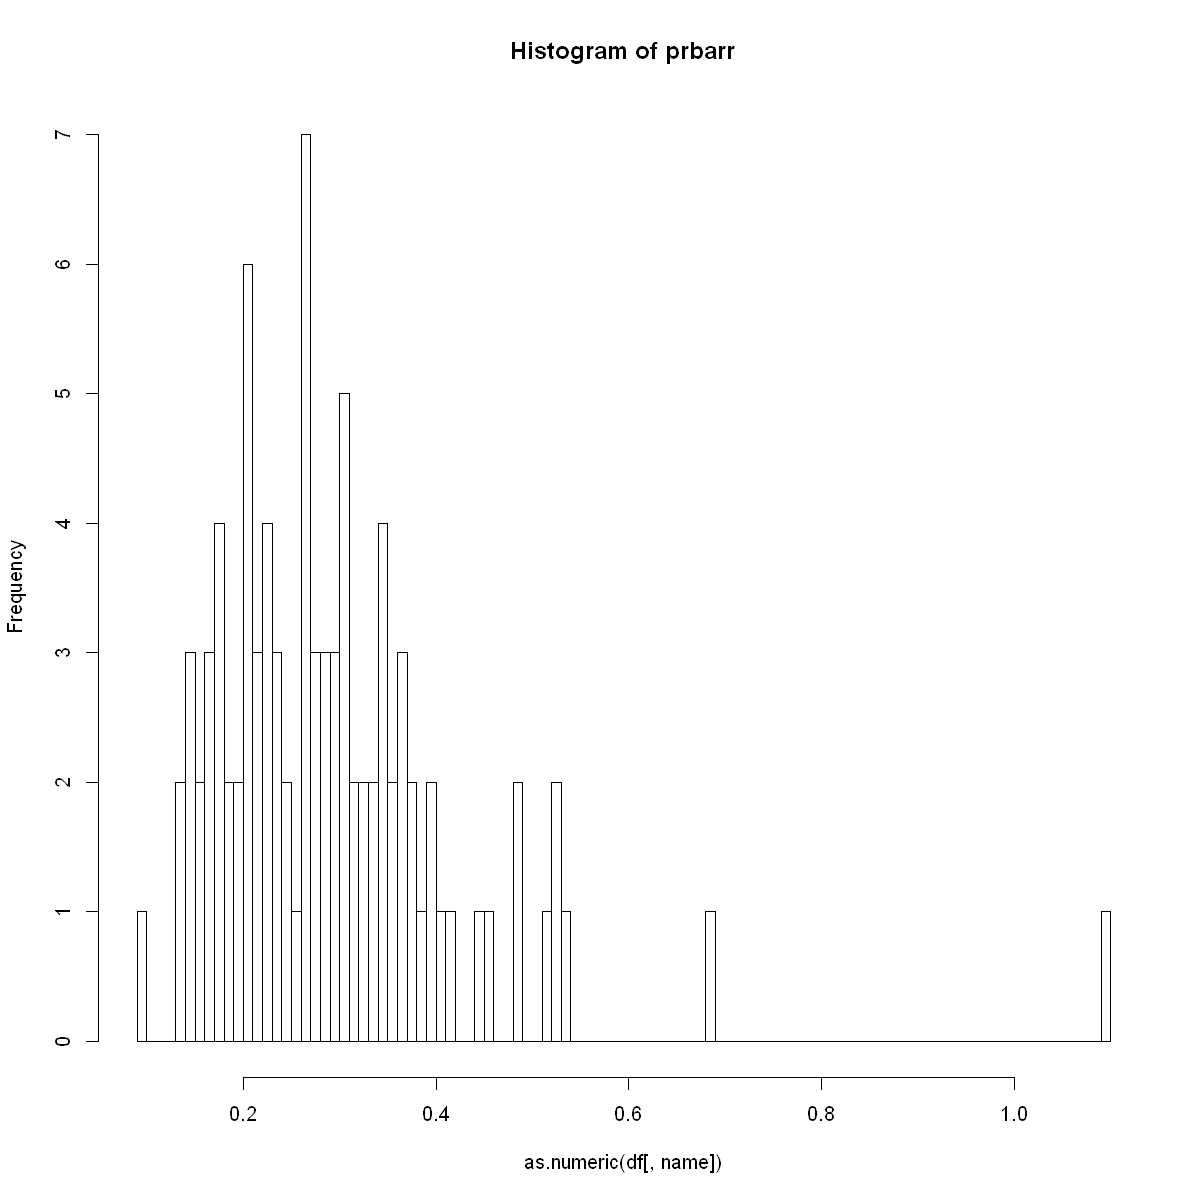

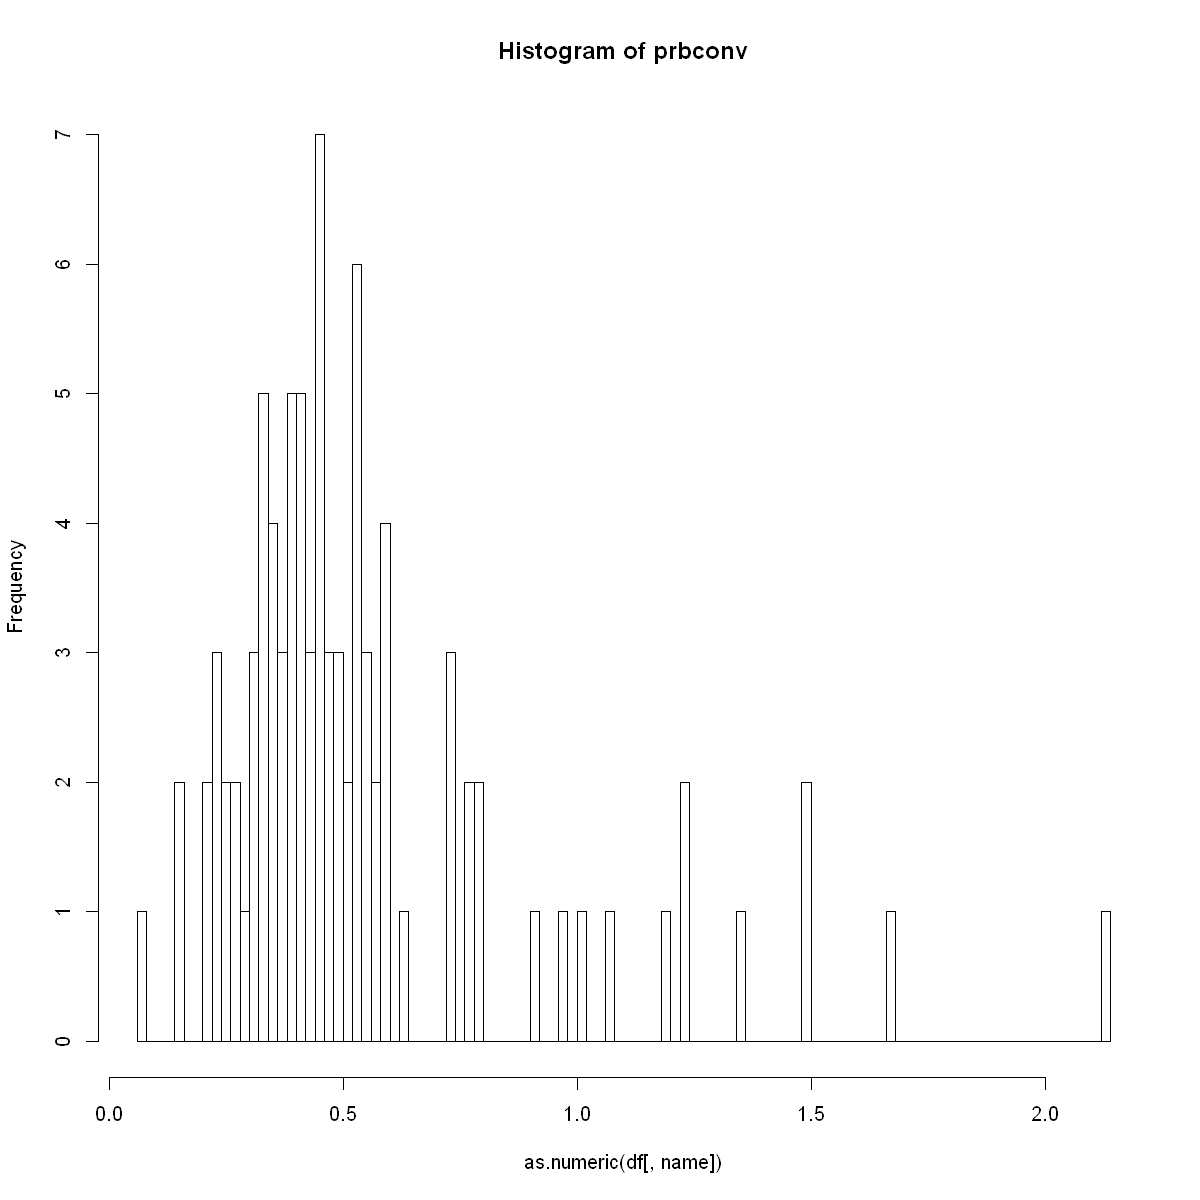

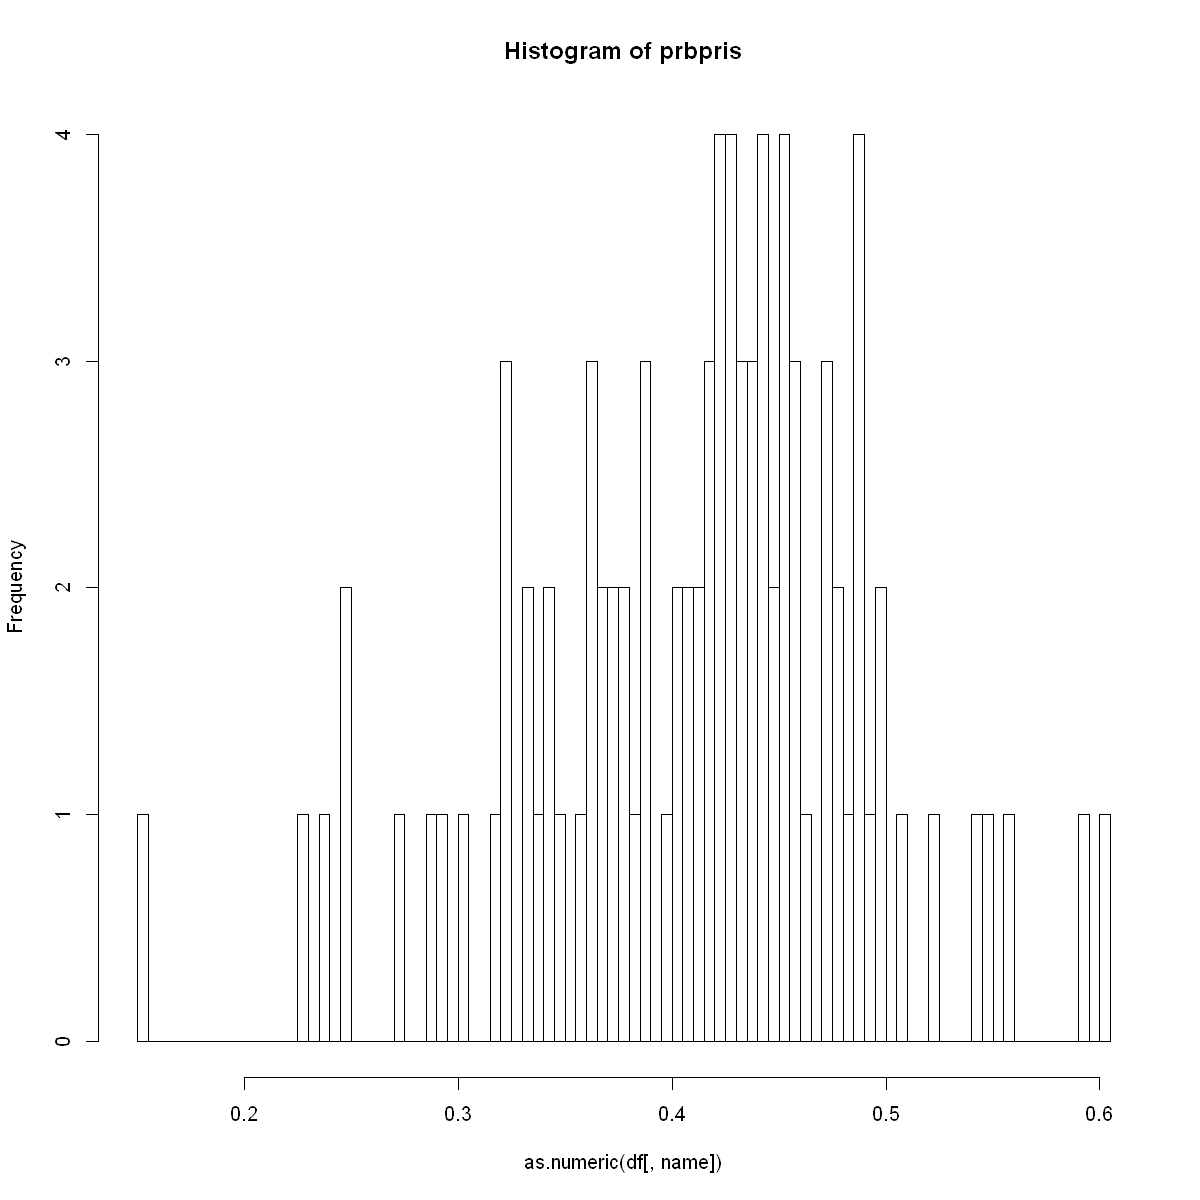

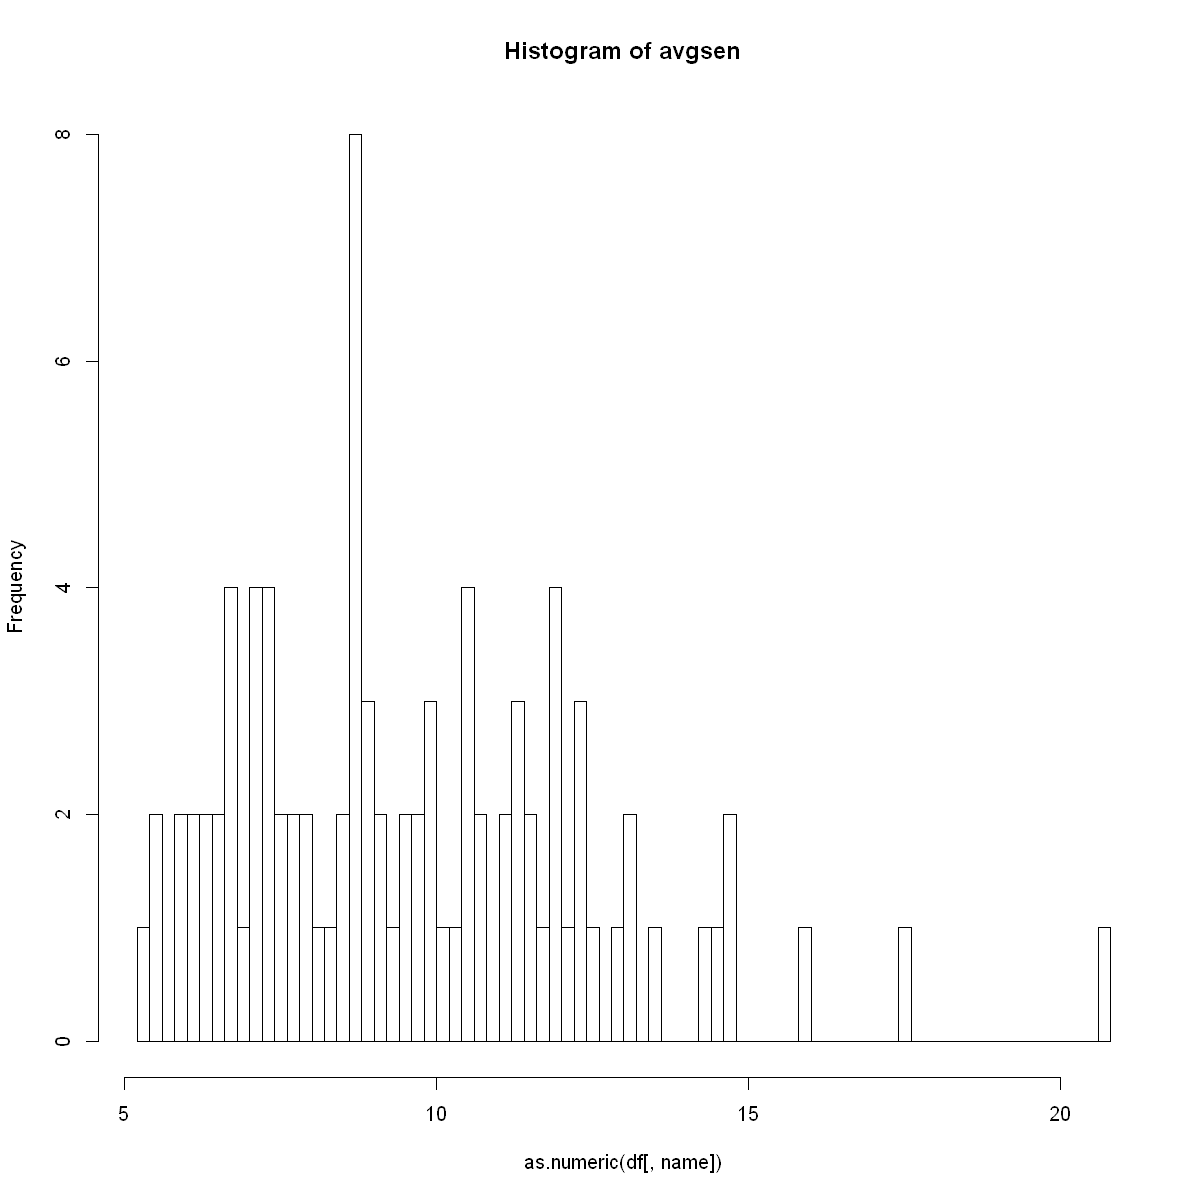

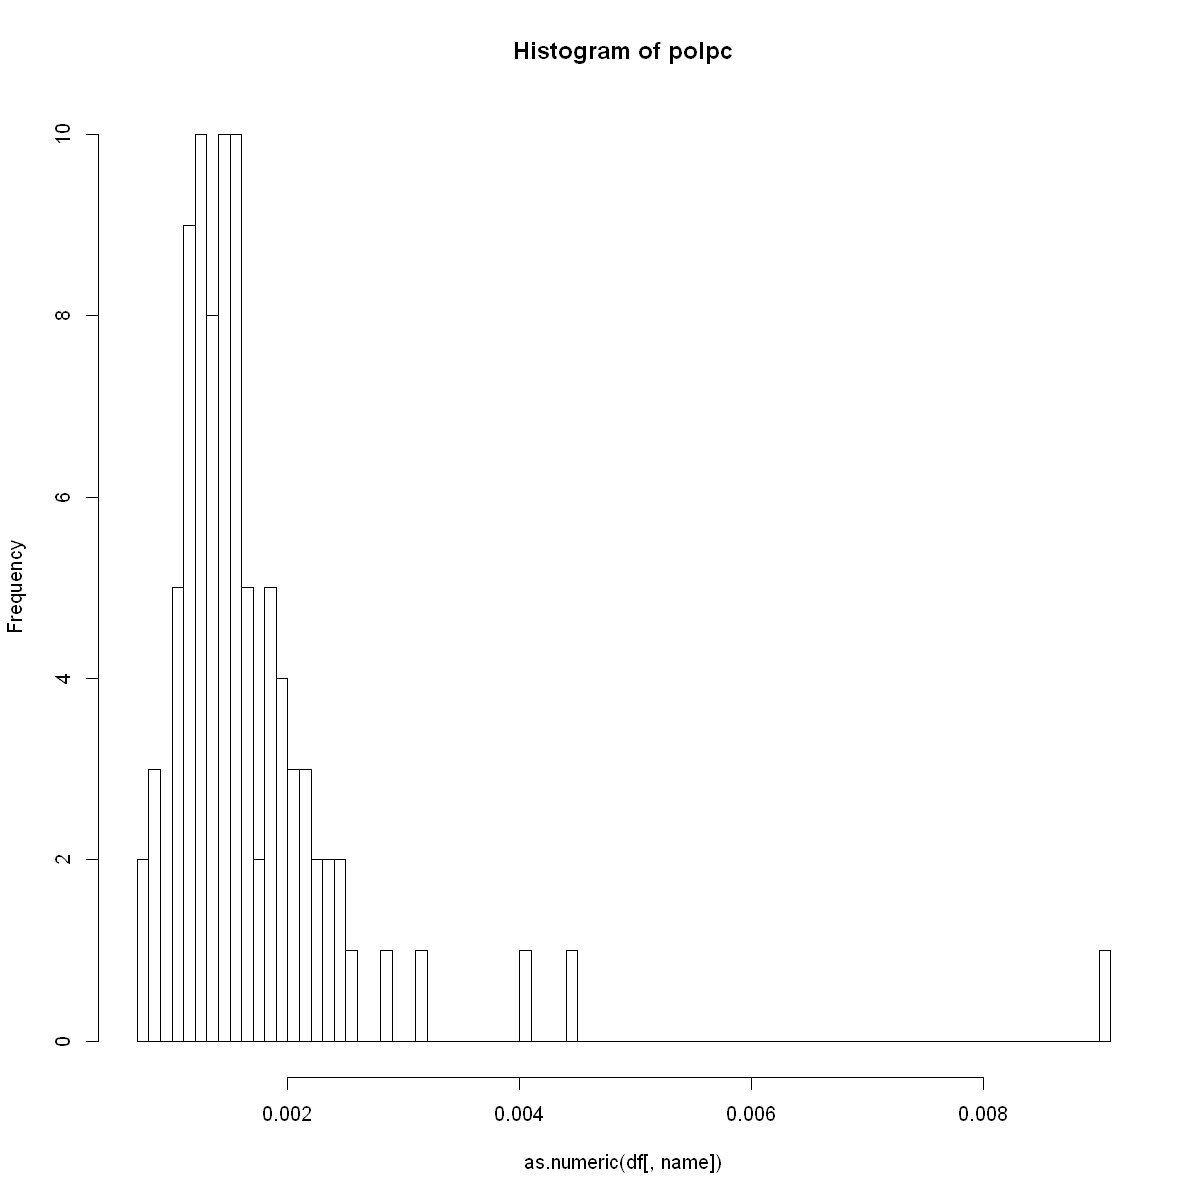

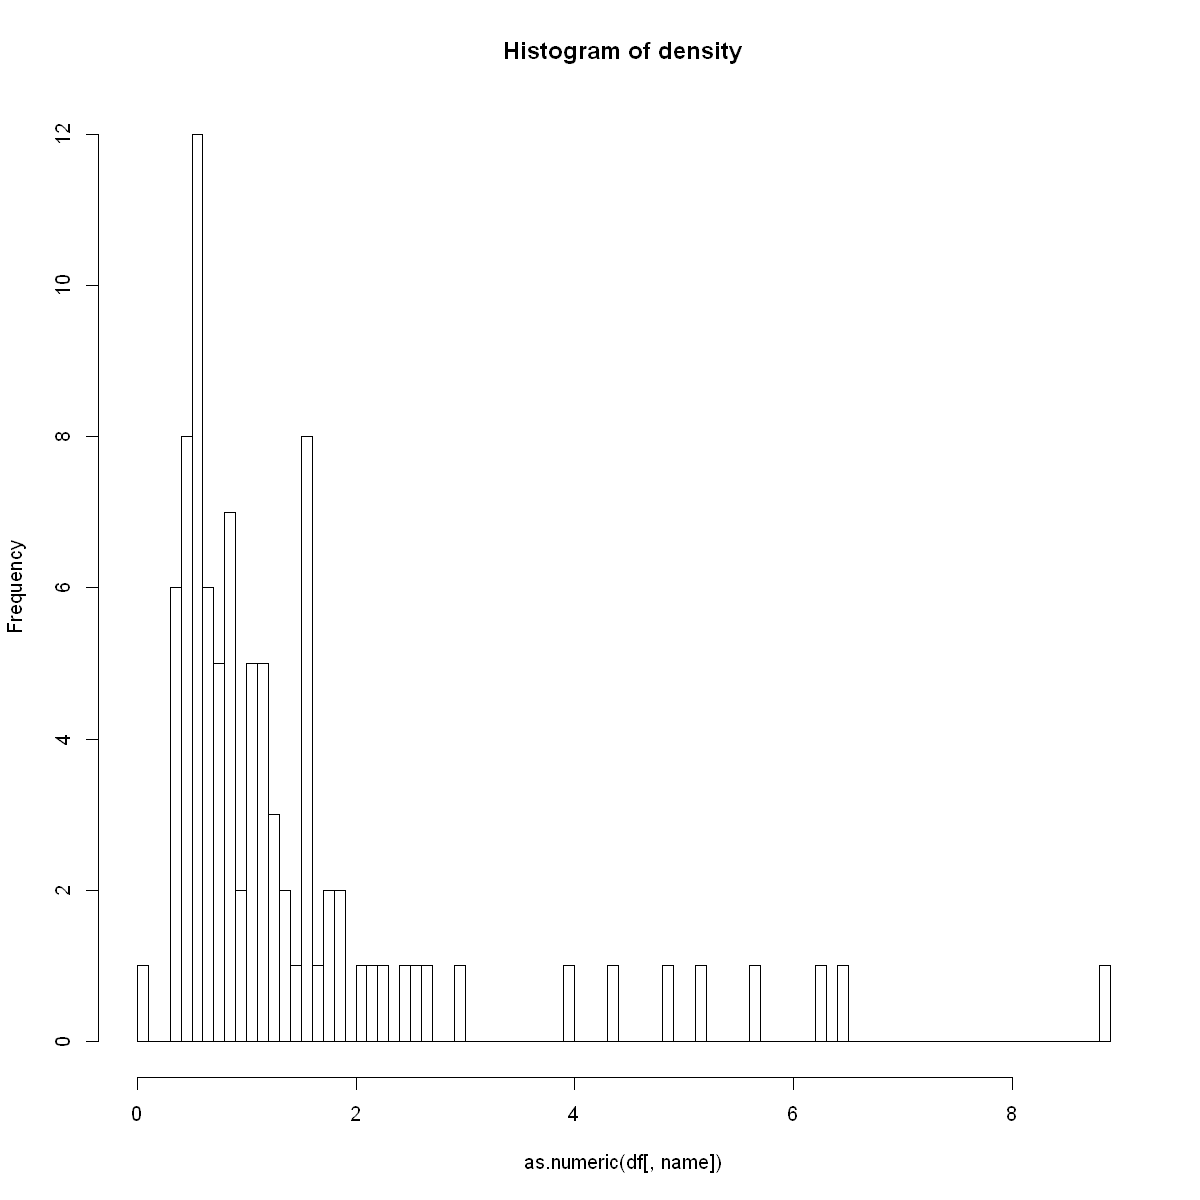

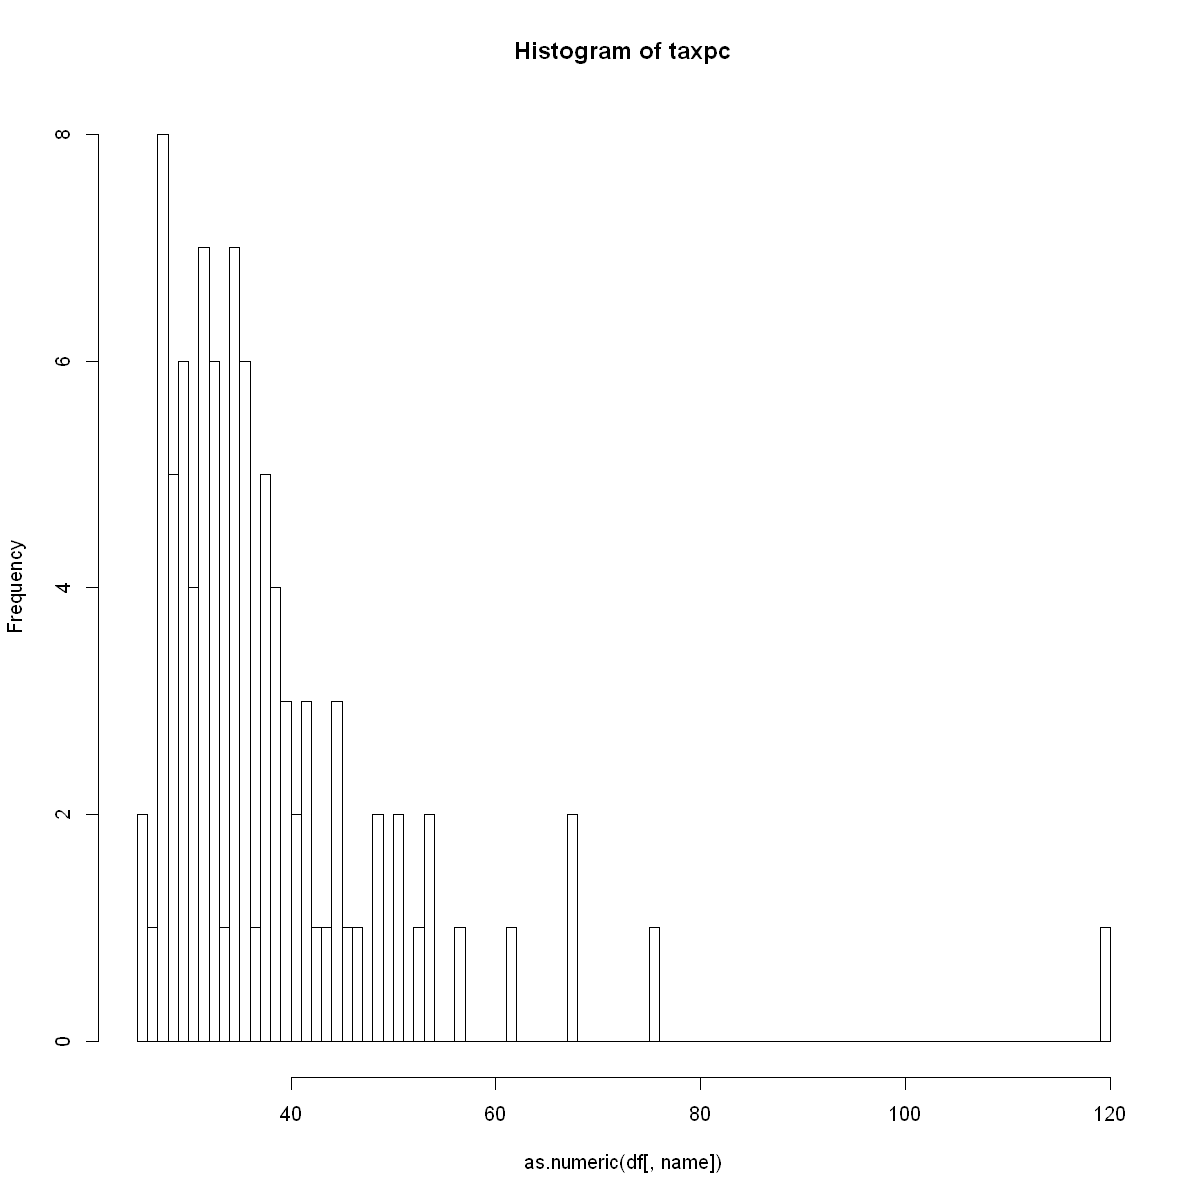

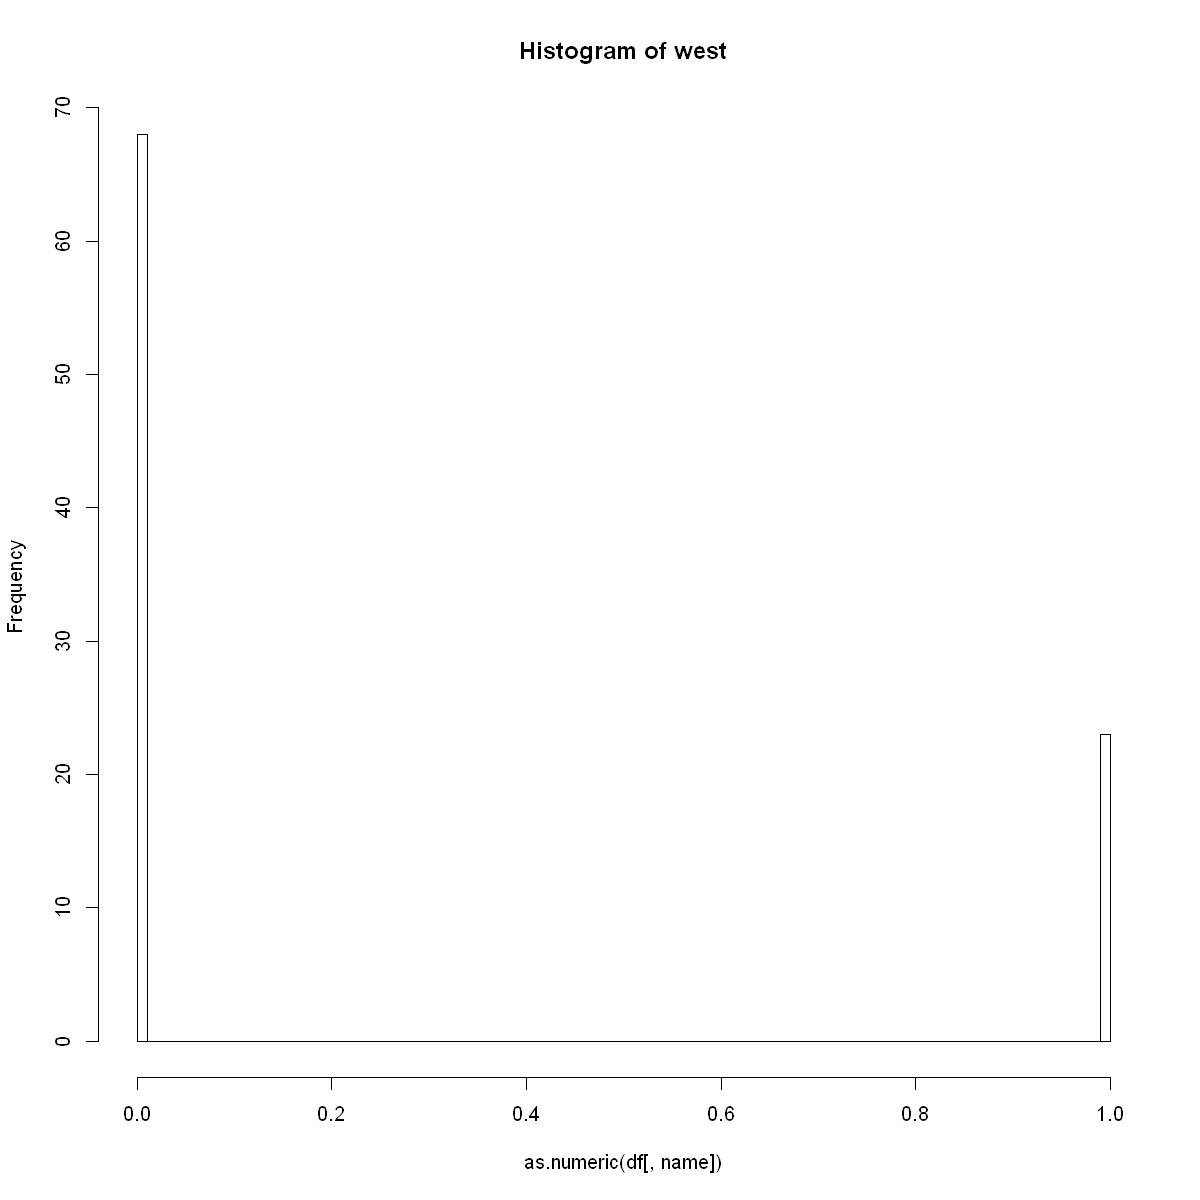

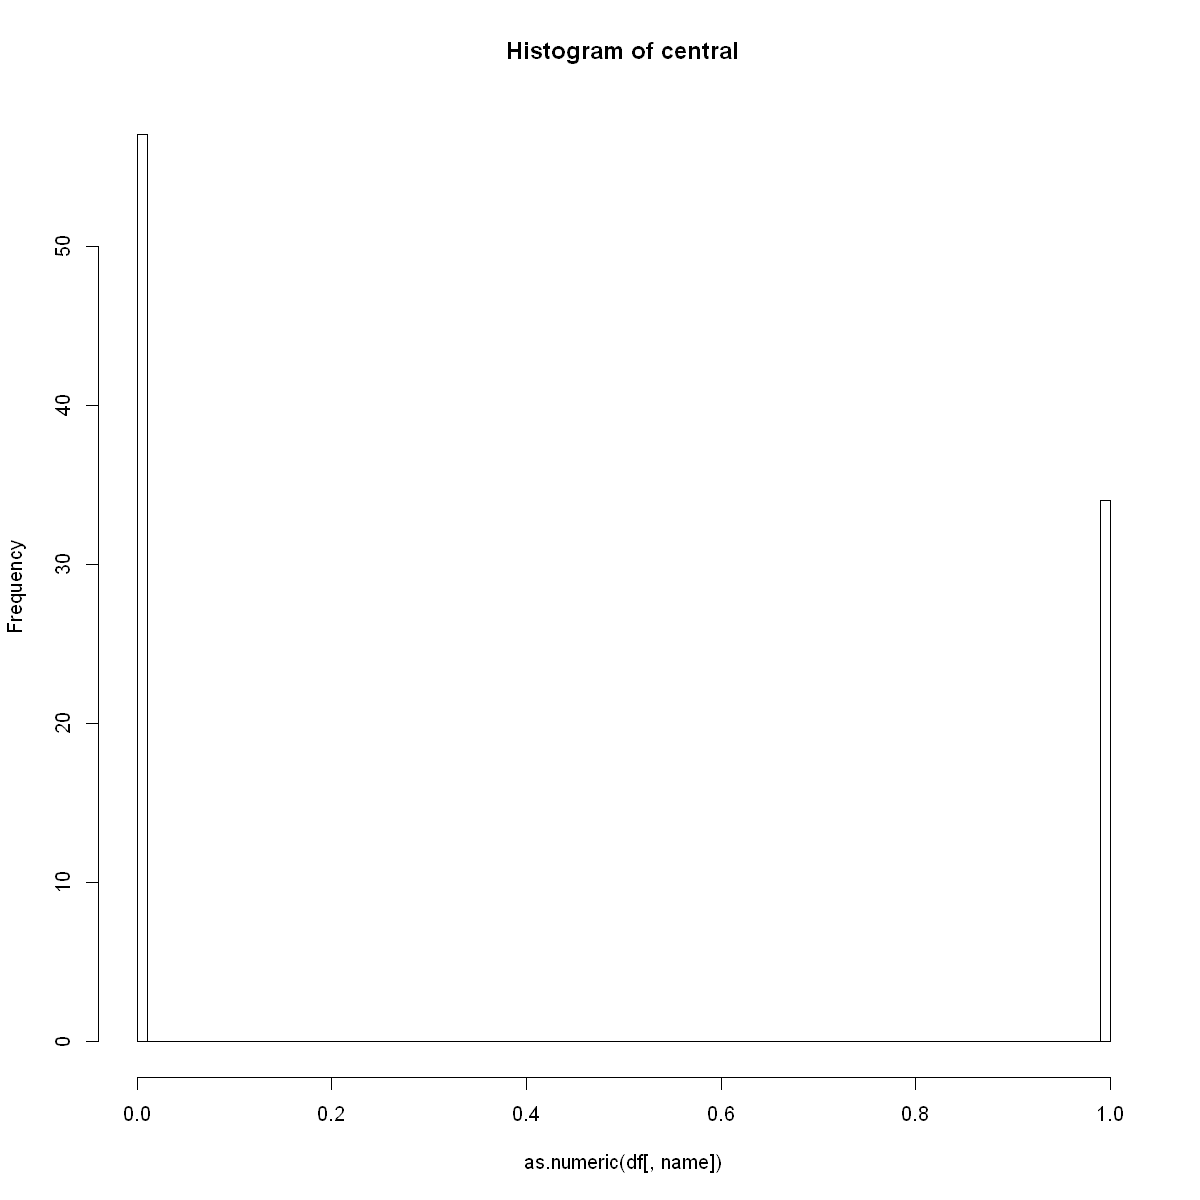

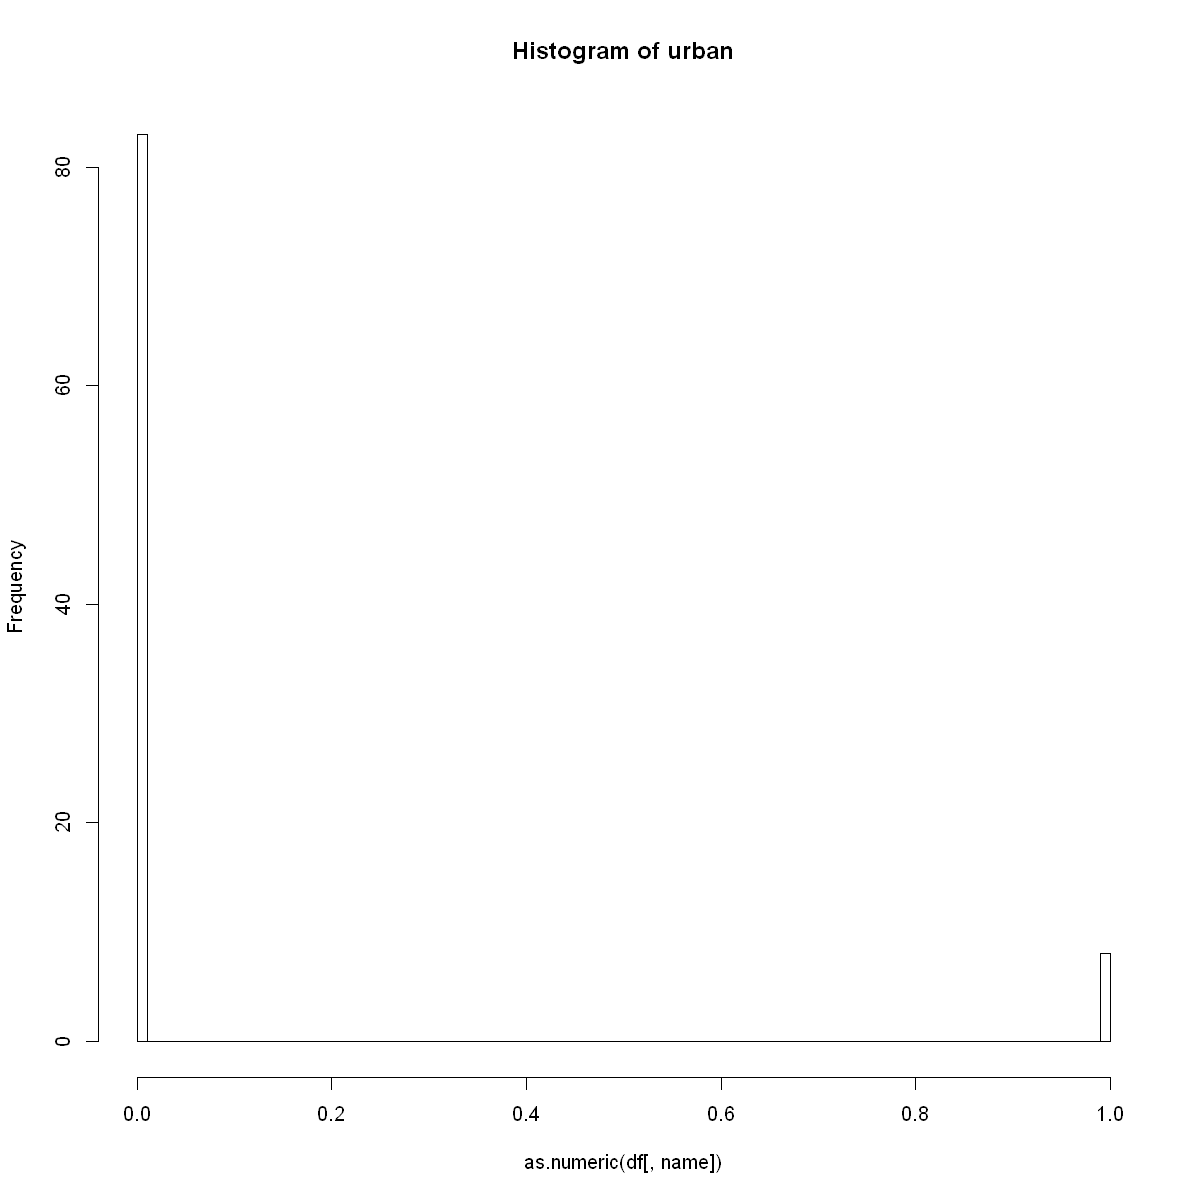

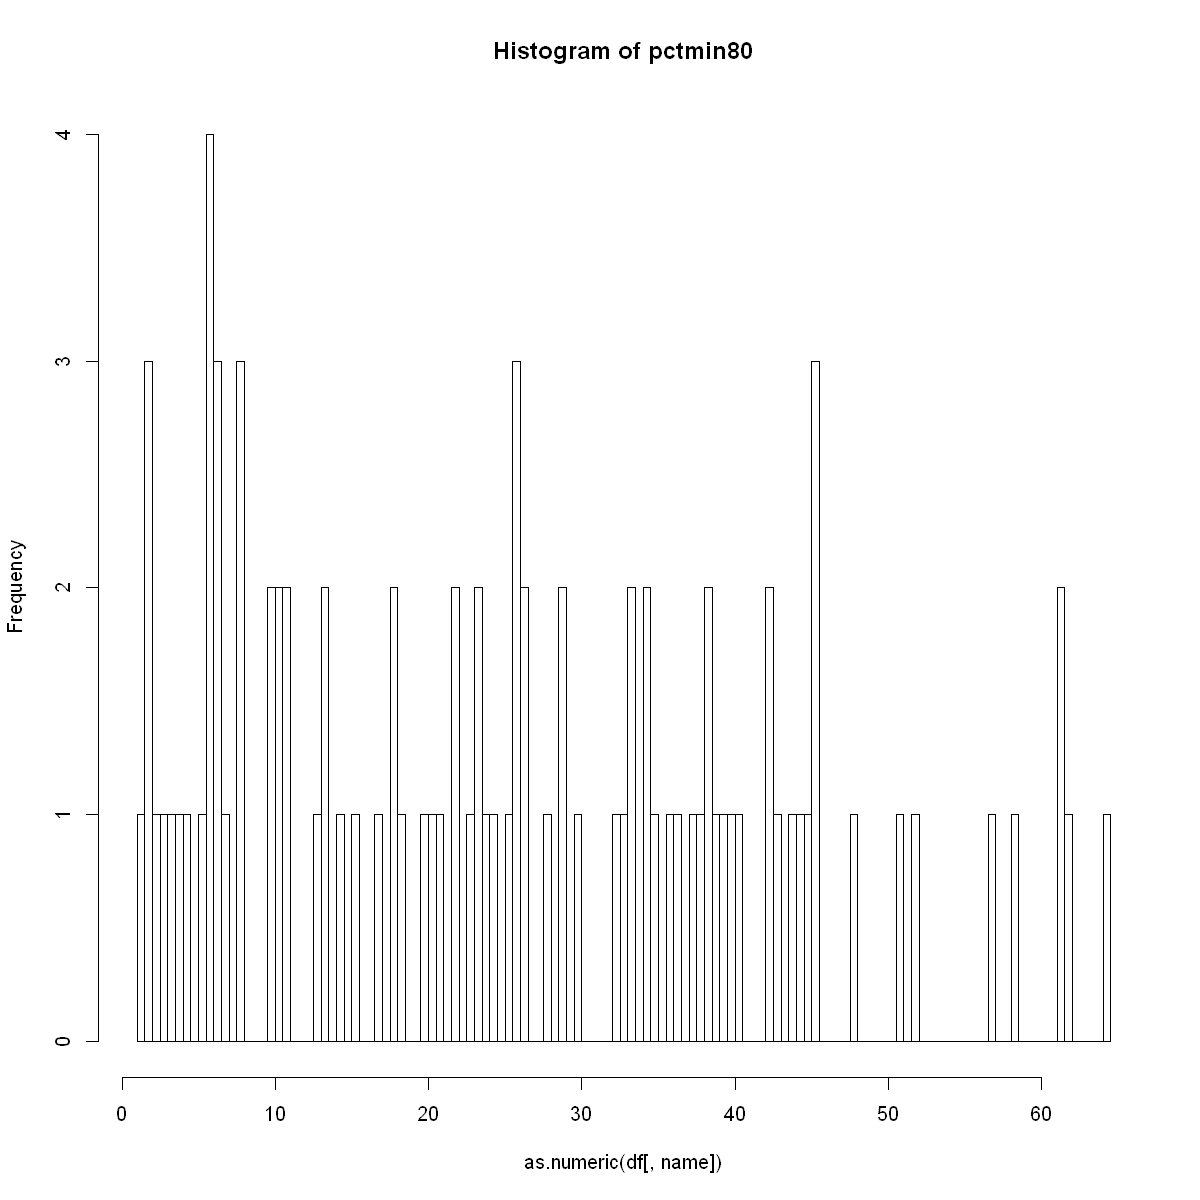

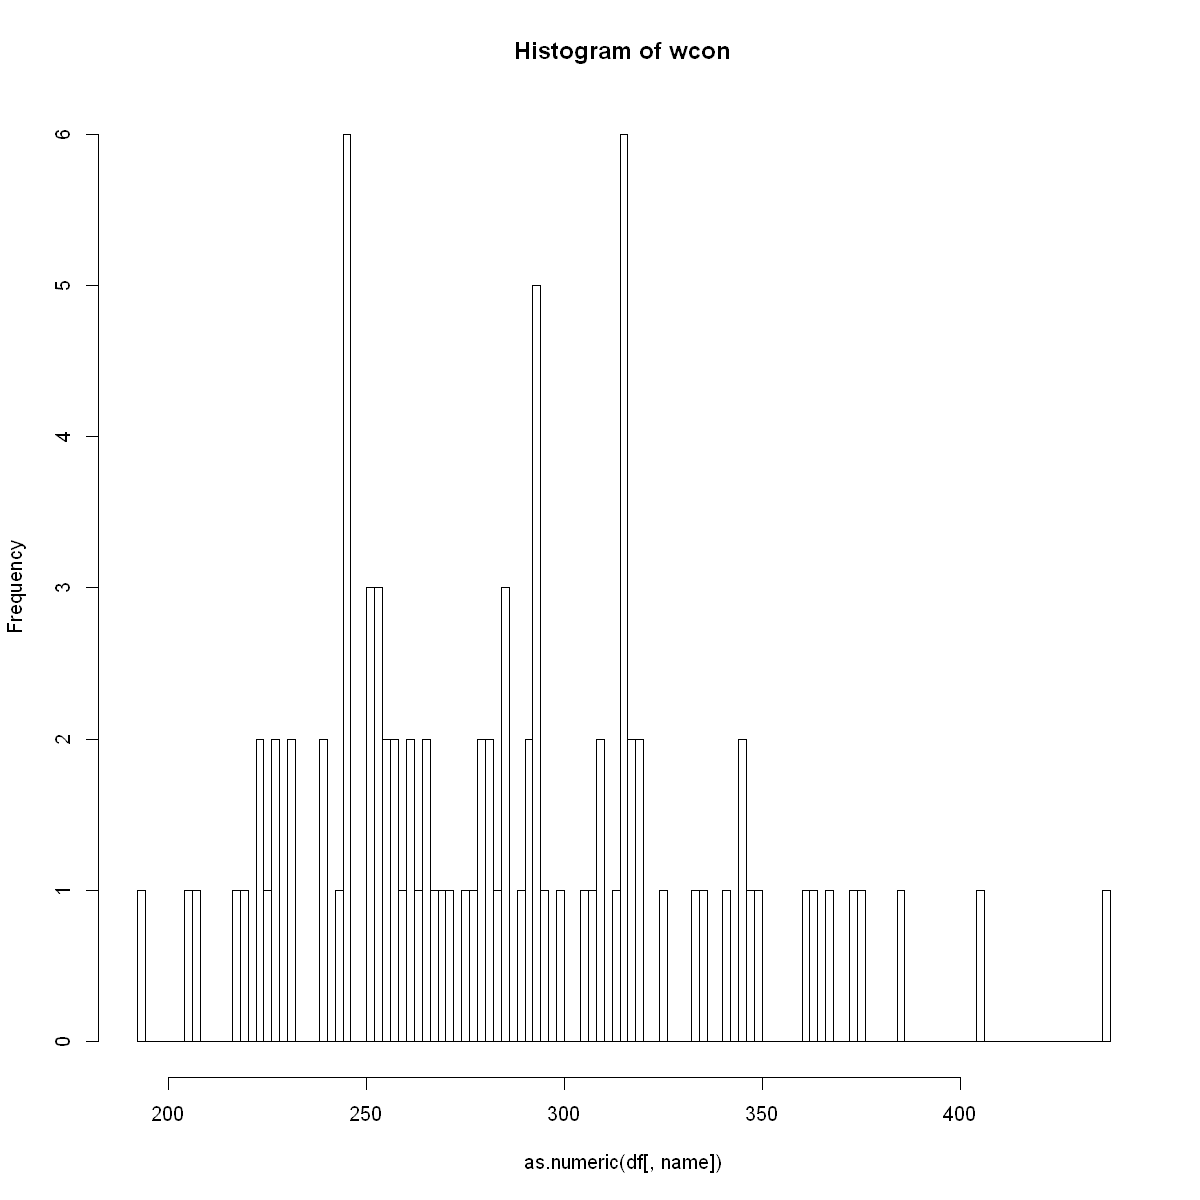

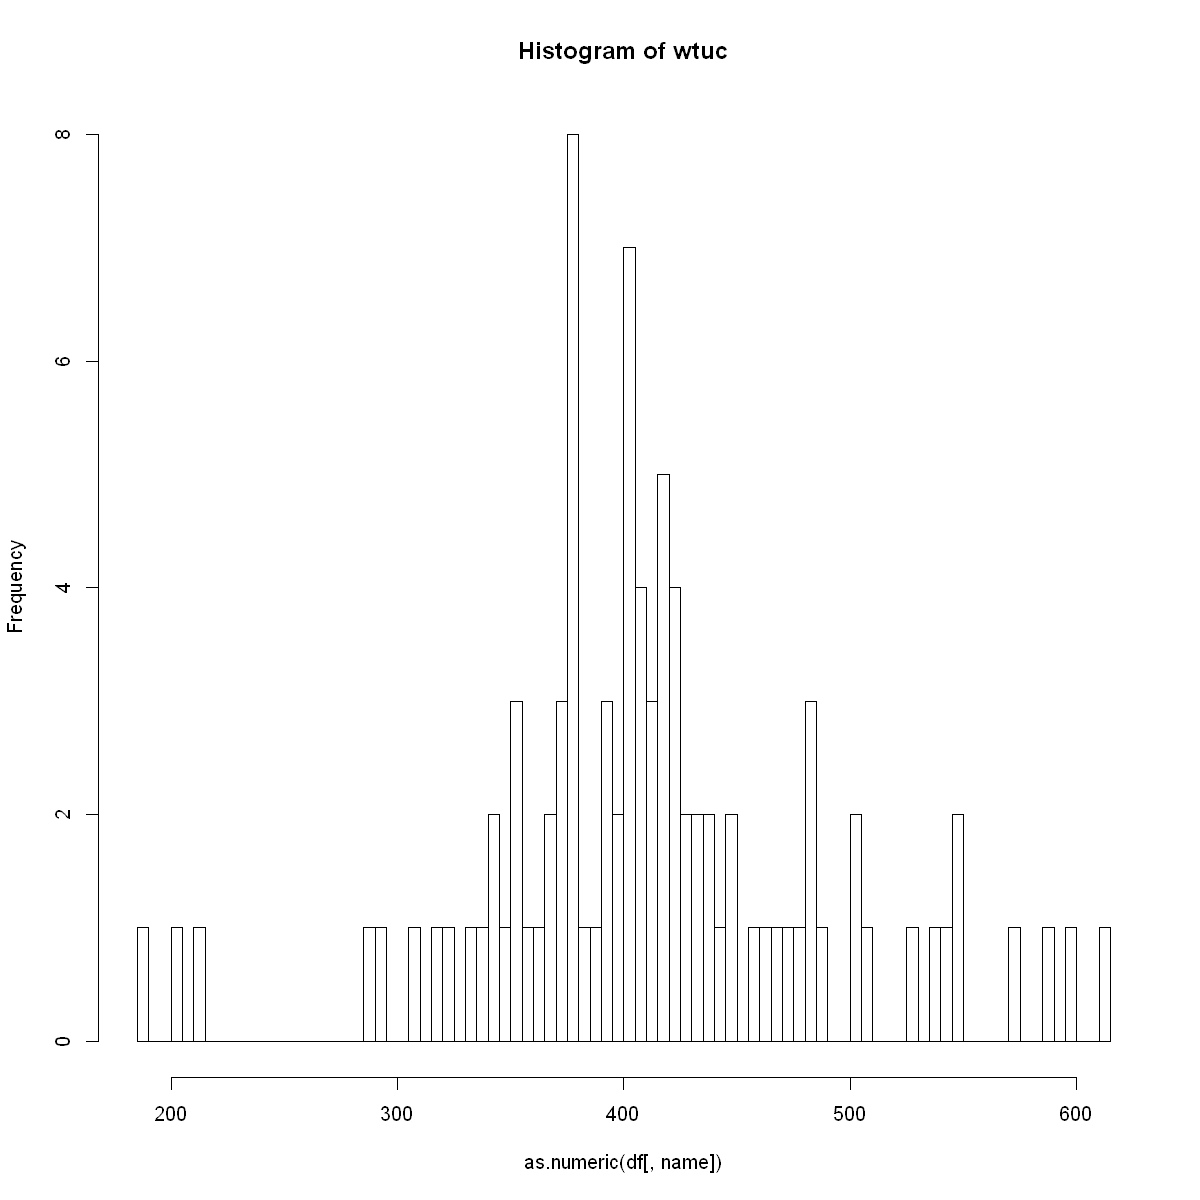

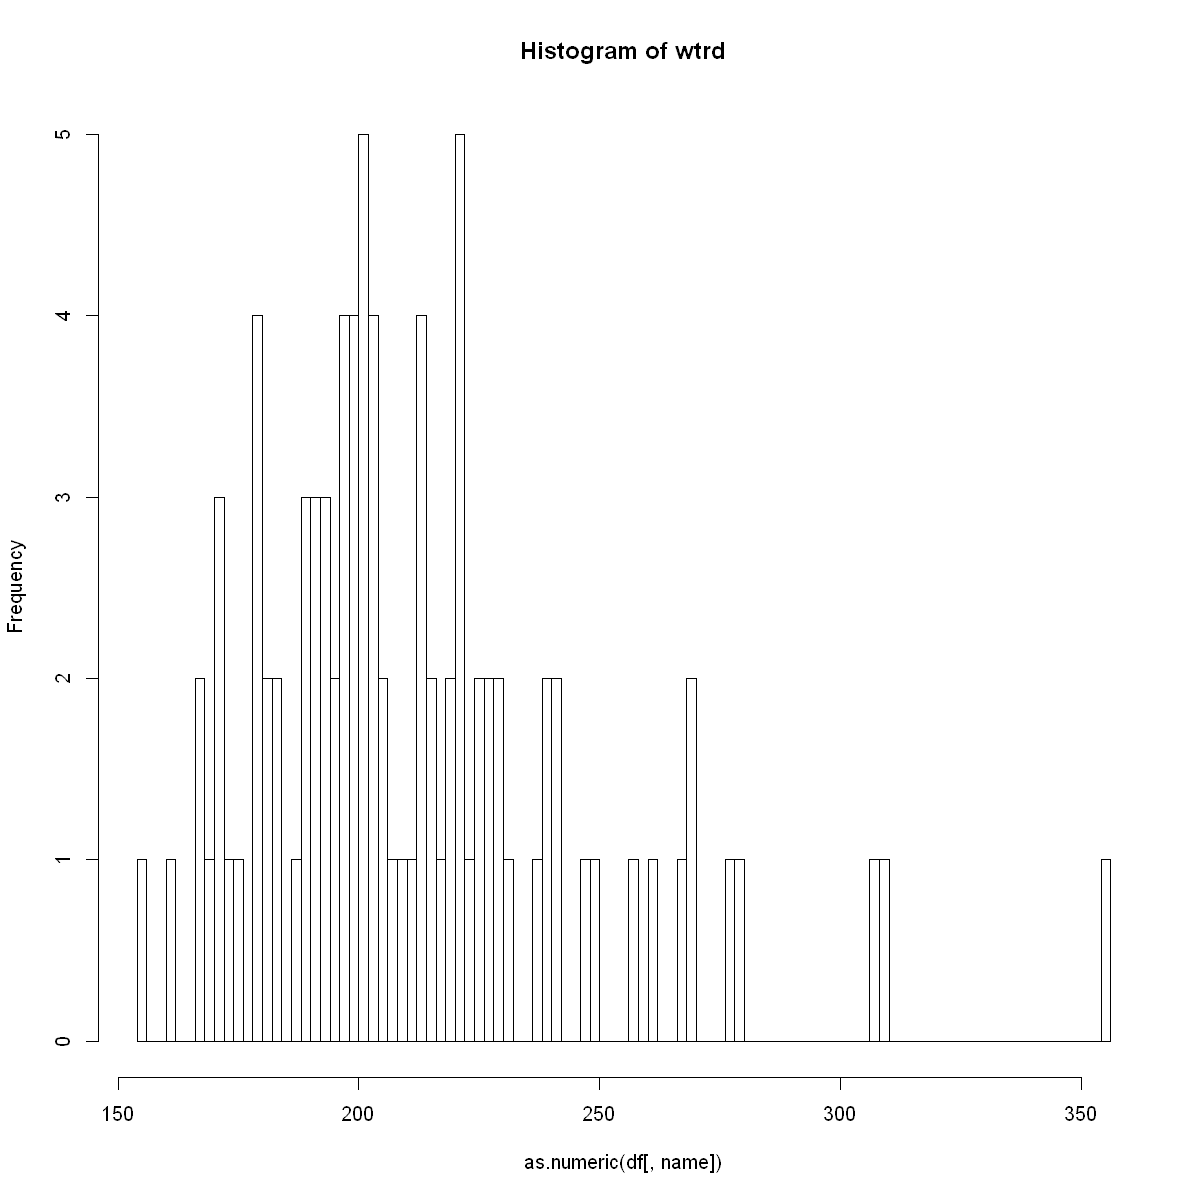

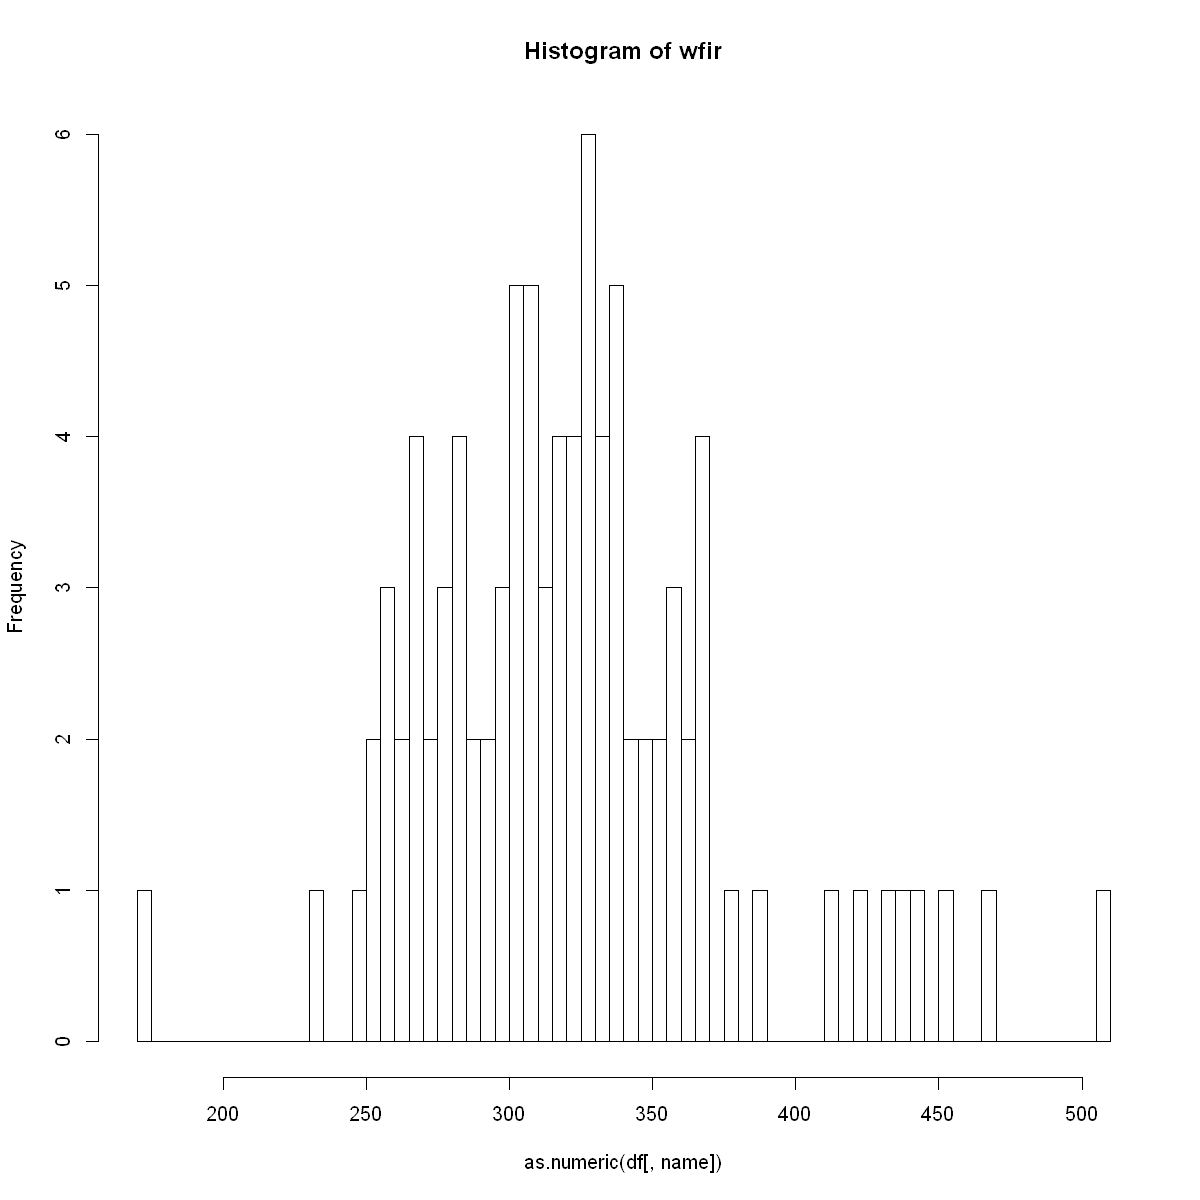

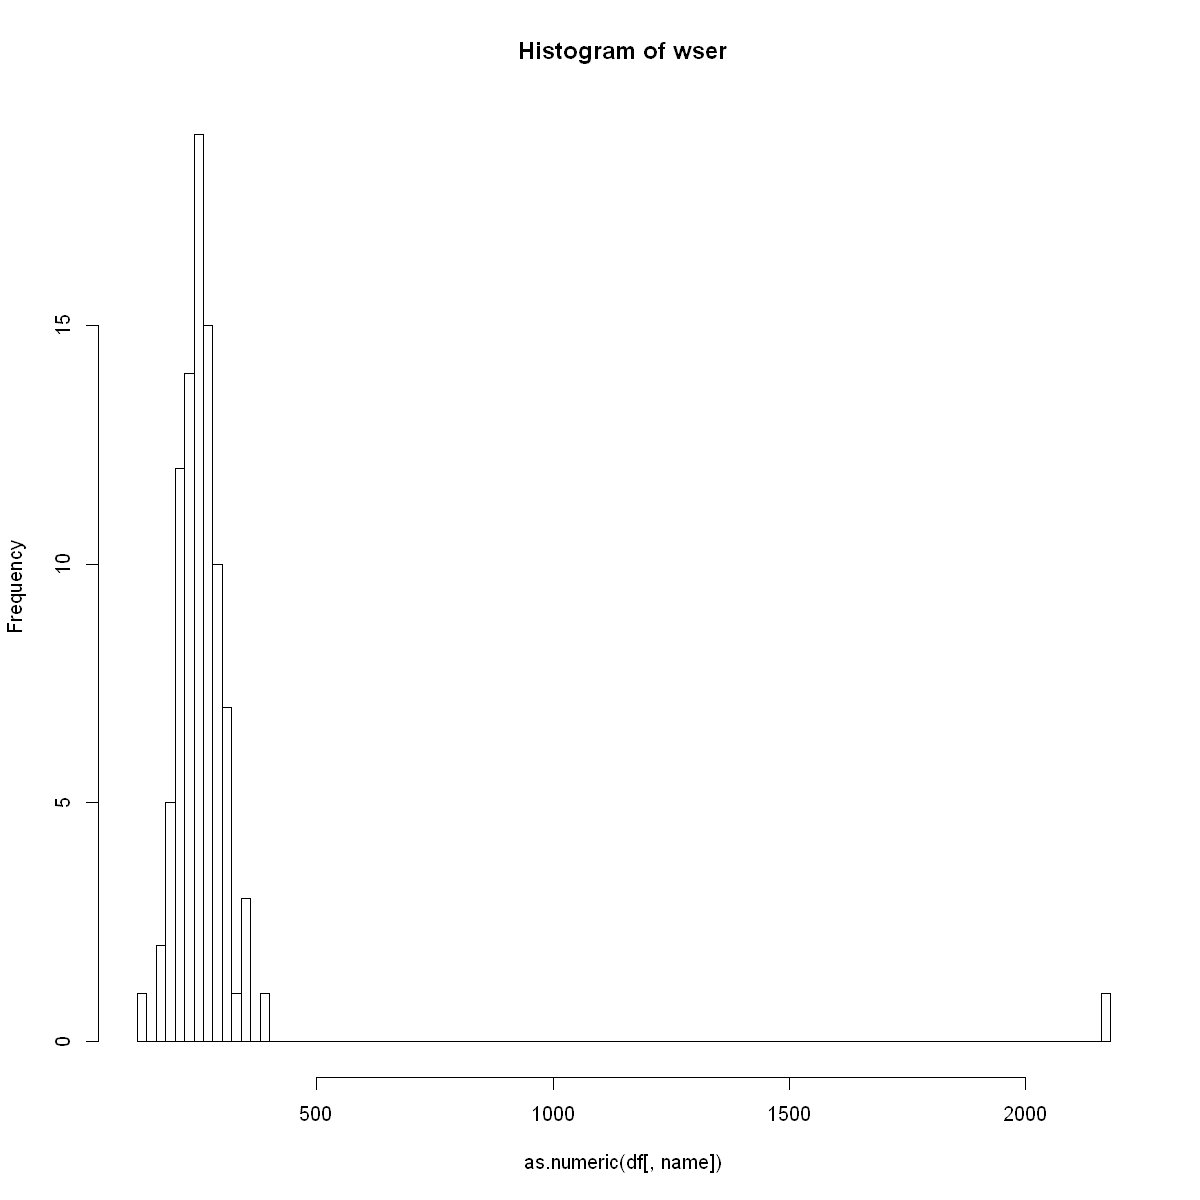

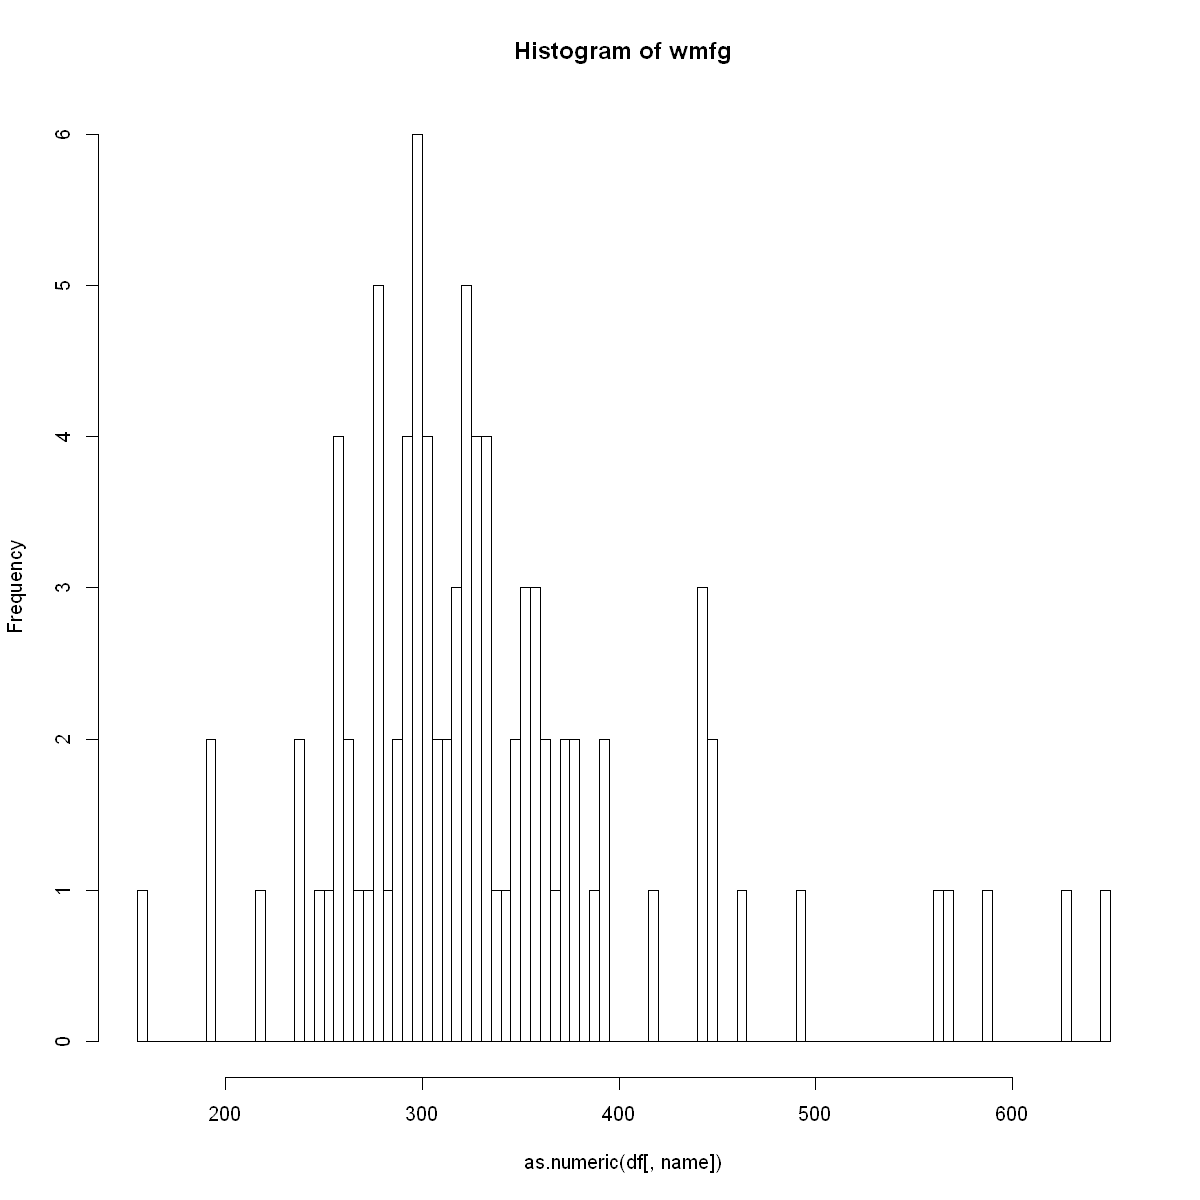

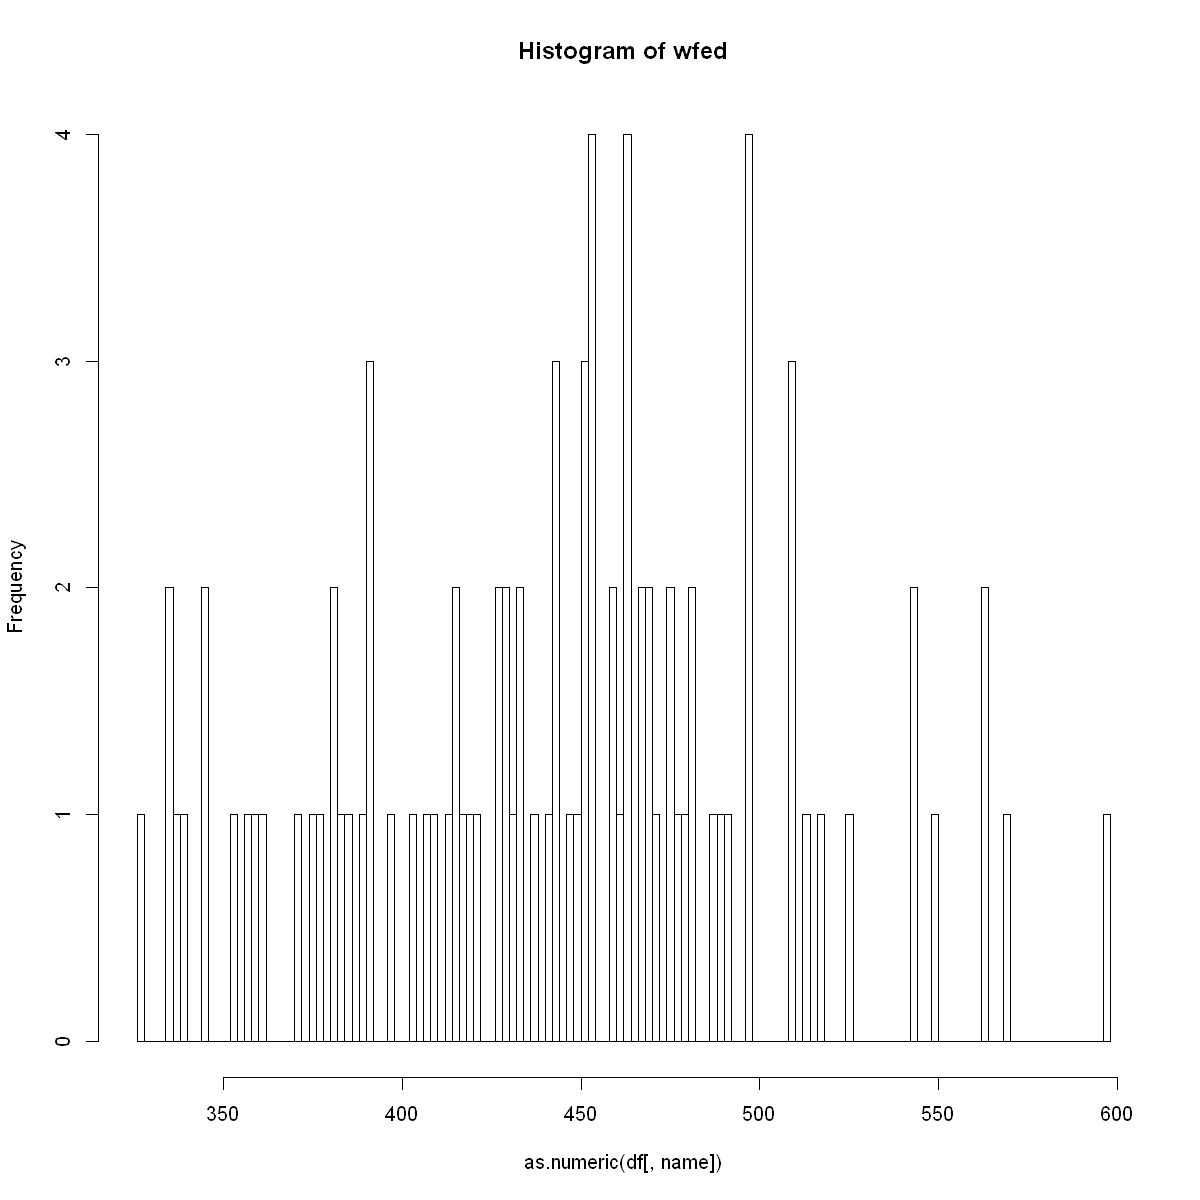

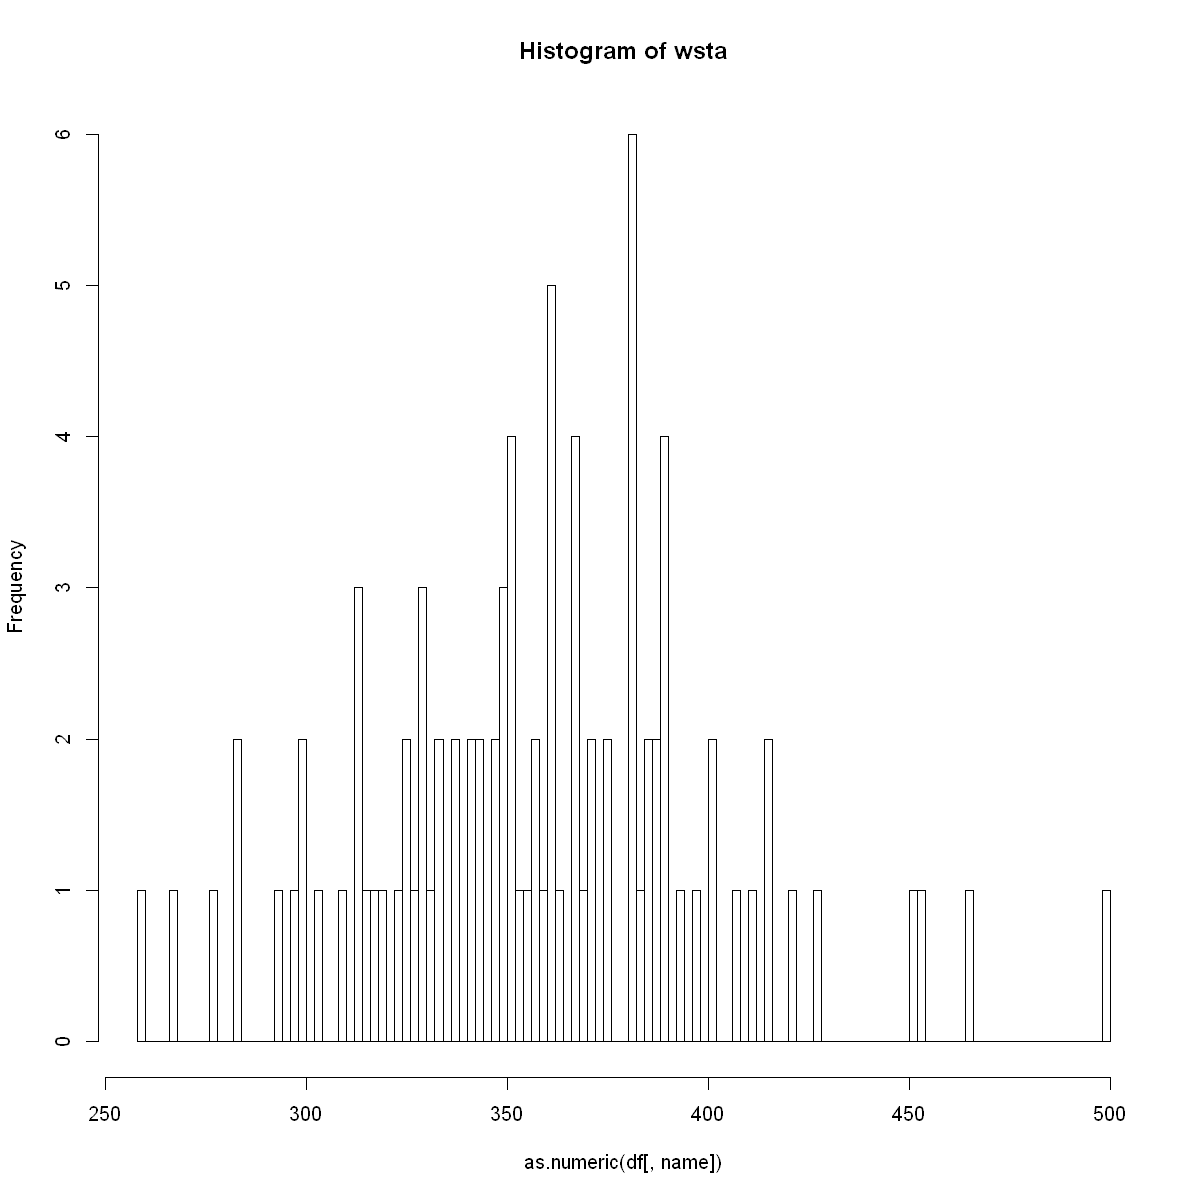

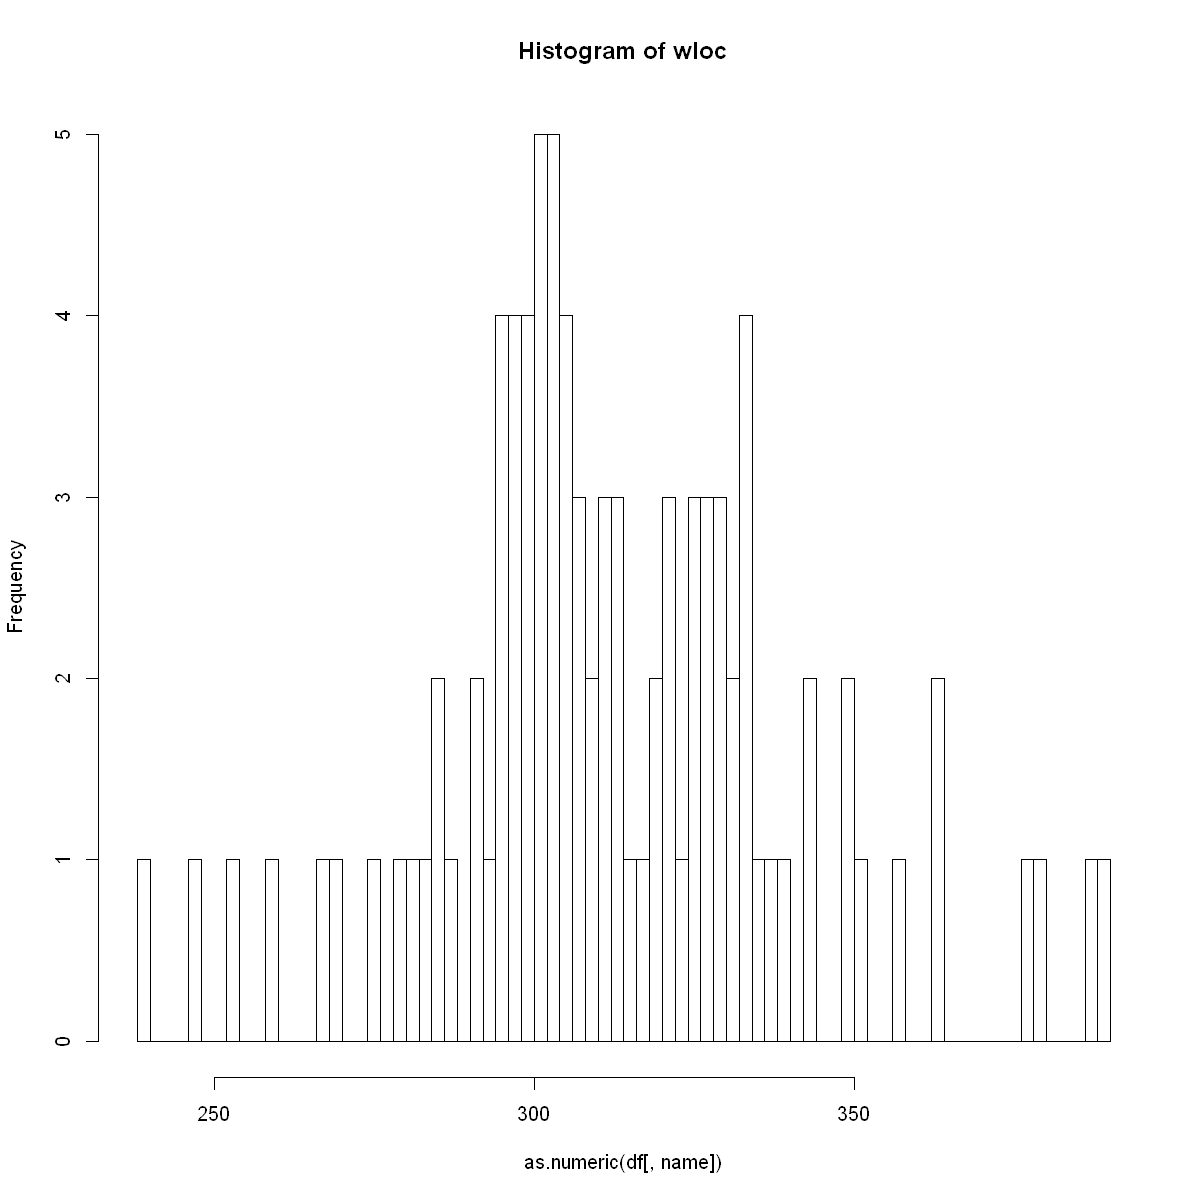

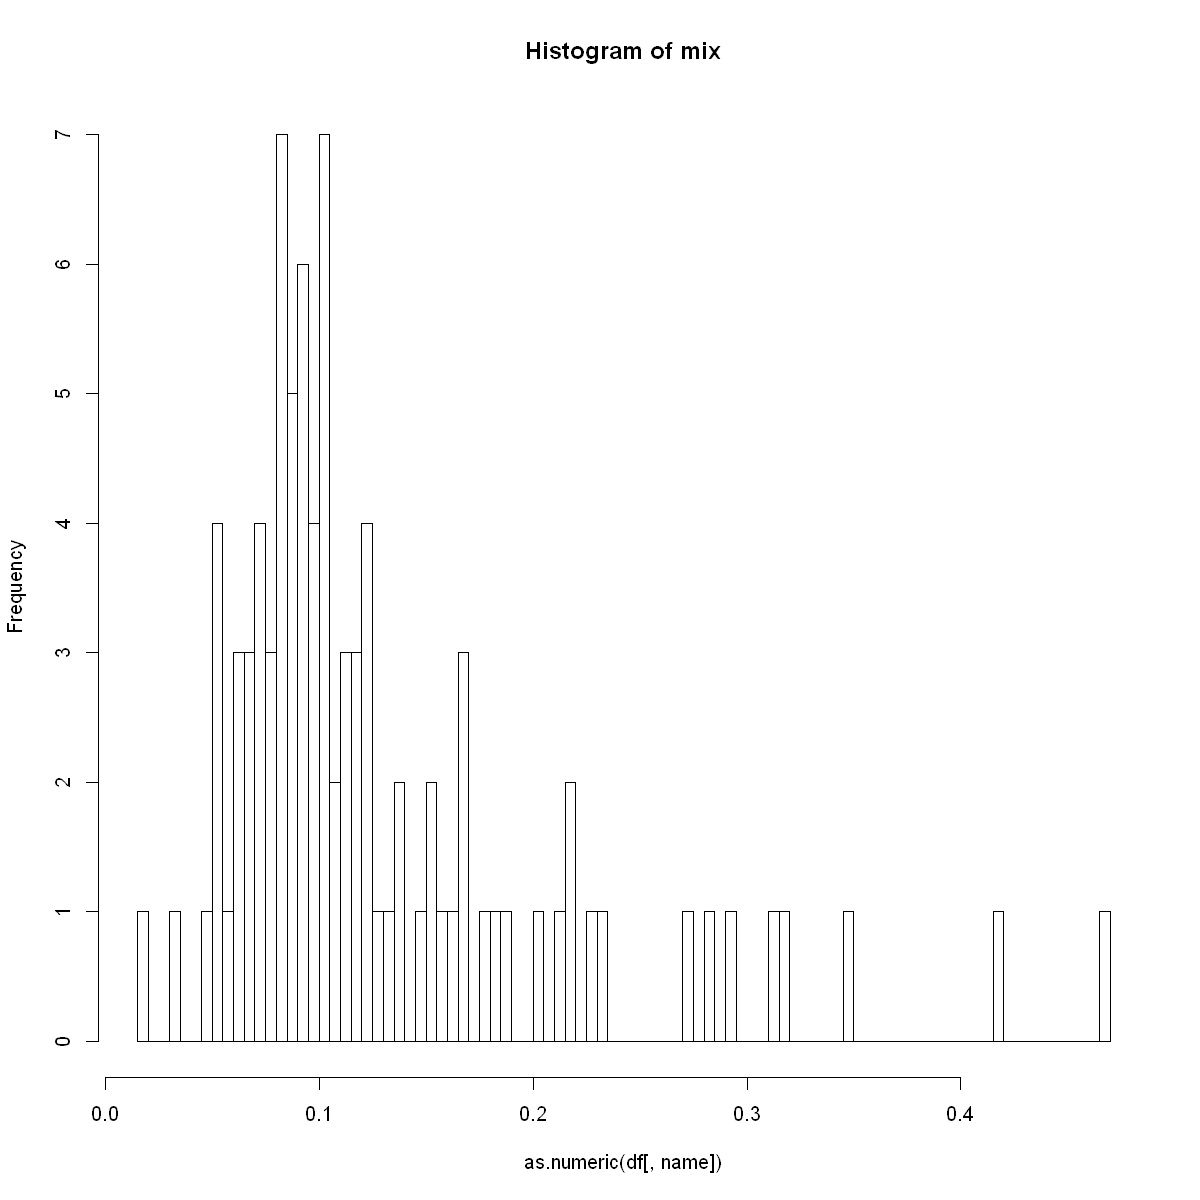

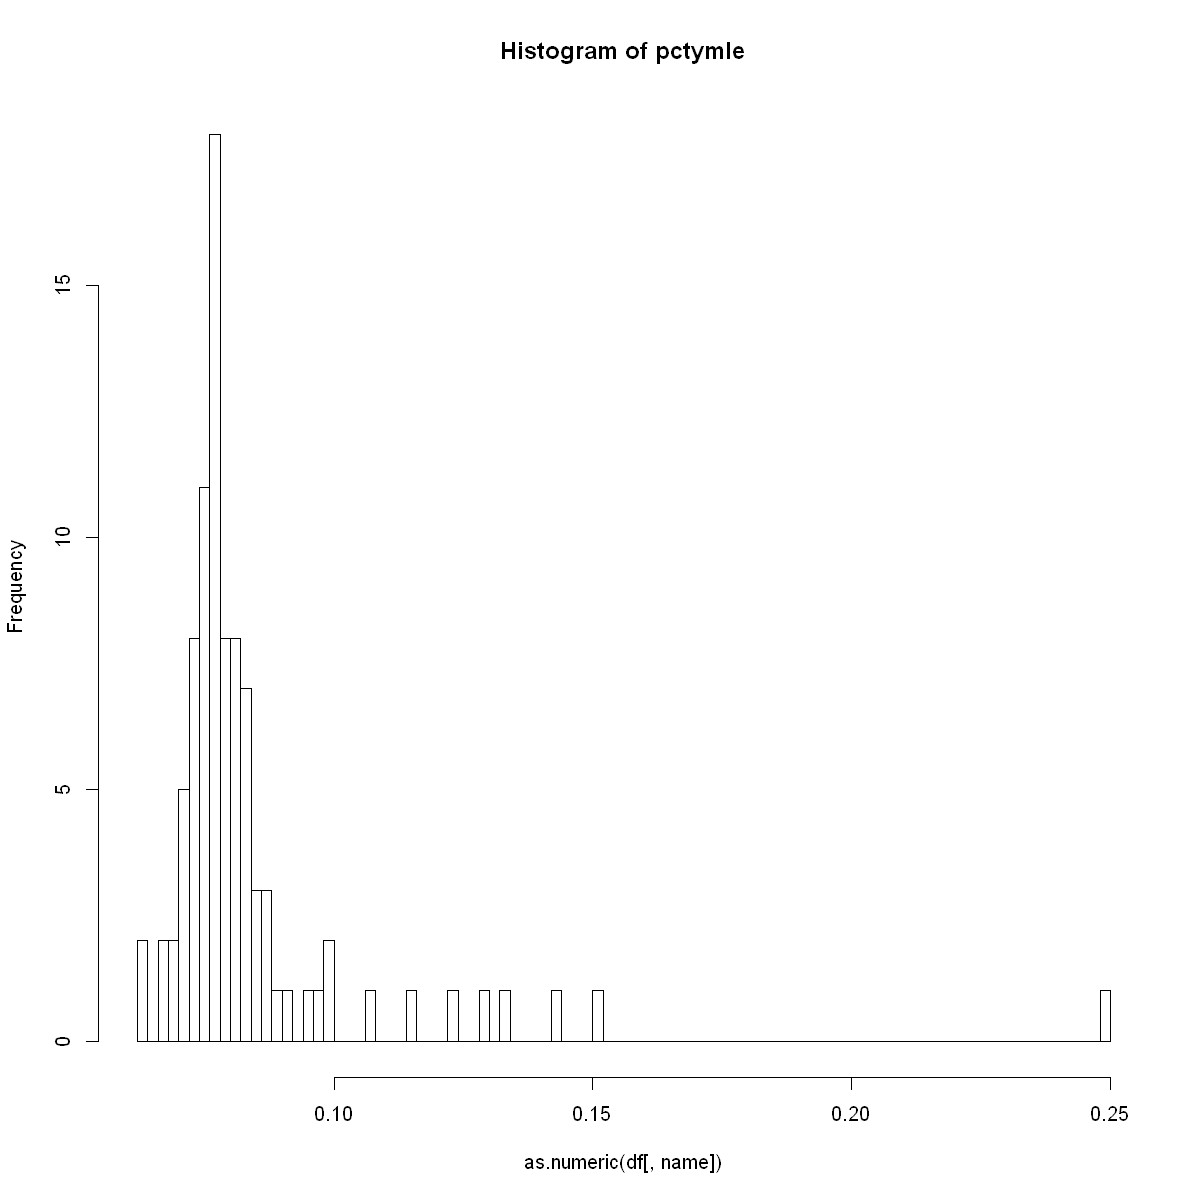

In [106]:
for (name in names(df)) {
    hist(as.numeric(df[,name]), breaks=100, main = paste("Histogram of",name) )
}

In [34]:
FancyHist <- function(df, var, bins=100, width = 7, whRatio = 2/5){
    w_h_ratio = whRatio
    width = width
    options(repr.plot.width=width, repr.plot.height=width*whRatio)
    #Takes a data frame and a string variable name in that data frame and produces a histogram of it
    varMean = mean(df[,var])
    varSD = sd(df[,var])
    
    return(
        ggplot(df, aes_string(var)) +
          geom_histogram(bins=bins, fill="red", color="black") + 
          geom_vline(aes(xintercept = varMean), colour="black", size = 1) + 
          geom_vline(aes(xintercept = varMean-varSD), colour="black", size = 0.5, linetype="dashed") + 
          geom_vline(aes(xintercept = varMean+varSD), colour="black", size = 0.5, linetype="dashed") + 
          geom_vline(aes(xintercept = varMean-2*varSD), colour="gray", size = 0.75, linetype="dashed") + 
          geom_vline(aes(xintercept = varMean+2*varSD), colour="darkgray", size = 0.75, linetype="dashed") +
          ggtitle(paste("Histogram of ", var))
    )
}